Welcome to our journey through a cool dataset all about flights! This dataset is like a big treasure chest, full of information about when flights leave, when they arrive, how long they're delayed, how far they go, and lots more. We'll be playing detective to spot patterns and find clues that help us figure out what makes flights late. So, let's buckle up and get ready for a fun ride through this flight data!

    1. Data Understanding
2. Exploratory Data Analysis (EDA)
   - Univariate Analysis
   - Bivariate Analysis
   

Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [ ]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 120

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#F3E8FF'}, style='darkgrid')

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">

First, I am going to load the dataset:

In [ ]:
# Read dataset
df = pd.read_csv('flights.csv')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.



  | __Variable__ | __Description__ |
|     :---      |       :---      |      
| __id__ | A unique identifier assigned to each flight record in this dataset. |                
| __year__ | The year in which the flight took place. The dataset includes flights from the year 2013 |                        
| __month__ | The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December) |
| __day__ | The day of the month on which the flight took place, represented by an integer from 1 to 31 |
| __dep_time__ | The actual departure time of the flight, represented in 24-hour format (hhmm) |                     
| __sched_dep_time__ | The locally scheduled departure time of the flight, presented in a 24-hour format (hhmm) |
| __dep_delay__ | The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times. Positive values indicate a delay, while negative values indicate an early departure. |  
| __arr_time__ | The actual arrival time of the flight, represented in 24-hour format (hhmm) |                      
| __sched_arr_time__ | The locally scheduled arrival time of the flight, presented in a 24-hour format (hhmm) |
| __arr_delay__ |  The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times. Positive values indicate a delay, while negative values indicate an early arrival |
| __carrier__ |  A two-letter code representing the airline carrier responsible for the flight |                      
| __flight__ | The designated number of the flight |              
| __tailnum__ | A unique identifier associated with the aircraft used for the flight |                      
| __origin__ | A three-letter code signifying the airport from which the flight departed |
| __dest__ | A three-letter code representing the airport at which the flight arrived |
| __air_time__ | The duration of the flight, measured in minutes |                 
| __distance__ | The total distance (in miles) between the origin and destination airports |
| __hour__ | The hour component of the scheduled departure time, expressed in local time |
| __minute__ | The minute component of the scheduled departure time, expressed in local time |
| __time_hour__ | The scheduled departure time of the flight, represented in local time and formatted as "yyyy-mm-dd hh:mm:ss" |
| __name__ | The full name of the airline carrier responsible for the flight |

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">

Now, I am goining to get a comprehensive overview of the dataset:

In [ ]:
# Display a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

Dataset Overview (Beginner Style)
The dataset has 336,776 rows and 21 columns.

Columns have different data types like:

int64 → whole numbers

float64 → decimal numbers

object → text or categories (like airline names)

Missing Values
Some columns have missing (null) values, such as:

dep_time, dep_delay, arr_time, arr_delay

tailnum (aircraft tail number), air_time

Data Type Fixing for ID & Flight
The id and flight columns are stored as numbers, but they are actually categorical (like labels).

So I converted them to string (object) type.

Why Convert to String?
1. Treated as categories
Helps ML models or data analysis tools treat them like categories instead of numbers.

2. Avoid wrong math
Things like averaging flight numbers don't make sense — converting to string avoids that mistake.

3. Protect data integrity
Keeps the original format of IDs and avoids accidental changes during calculations.



In [ ]:
# Convert 'id' and 'flight' to object data type
df['id'] = df['id'].astype(str)
df['flight'] = df['flight'].astype(str)

In [ ]:
df['flight']

,flight
0,1545
1,1714
2,1141
3,725
4,461
...,...
336771,3393
336772,3525
336773,3461
336774,3572


<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">

Now let's look at the summary statistics of the numerical features:

In [ ]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
air_time,327346.0,150.686460,93.688305,20.0,82.0,129.0,192.0,695.0


* __`year`__: All records are from the year 2013, hence there is no variation.
* __`month`__, __`day`__, __`hour`__, __`minute`__: These features show the scheduled departure date and time. They have a good range and seem to be evenly distributed throughout the year and day.
* __`dep_time`__, __`sched_dep_time`__, __`arr_time`__, __`sched_arr_time`__: These are the actual and scheduled departure and arrival times of the flights. They are in the 24-hour format and cover all possible values.
* __`dep_delay`__, __`arr_delay`__: These are our target variables. They show the departure and arrival delays in minutes. The values range from negative (early departure or arrival) to positive (late departure or arrival).
* __`air_time`__: This is the flight duration in minutes. It varies from 20 to 695 minutes.
* __`distance`__: This is the total distance between the origin and destination airports. It varies from 17 to 4983 miles.  

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">
    
Afterward, let's look at the summary statistics of the categorical features:

In [ ]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,id,carrier,flight,tailnum,origin,dest,time_hour,name
count,336776,336776,336776,334264,336776,336776,336776,336776
unique,336776,16,3844,4043,3,105,6936,16
top,336775,UA,15,N725MQ,EWR,ORD,2013-09-13 08:00:00,United Air Lines Inc.
freq,1,58665,968,575,120835,17283,94,58665


* __`id`__, __`flight`__: These are unique identifiers and have a large number of unique values.
* __`carrier`__, __`name`__: These are airline carrier codes and names. There are 16 unique carriers in the dataset.
* __`tailnum`__: This is a unique identifier associated with the aircraft used for the flight. It also has a large number of unique values.
* __`origin`__, __`dest`__: These are the airport codes from which the flight departed and at which it arrived. There are 3 unique origin airports and 105 unique destination airports in the dataset.
* __`time_hour`__: This is the scheduled departure time of the flight, represented in local time and formatted as "yyyy-mm-dd hh:mm:ss". There are 6936 unique times in the dataset.

<a id="eda"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>



Univariate Analysis

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">
    
We can perform univariate analysis on these columns based on their datatype:

* For __numerical__ data, we can use a histogram to visualize the data distribution. The number of bins should be chosen appropriately to represent the data well.
* For __categorical__ data, we can use a bar plot to visualize the frequency of each category.

In [ ]:
# Set color for the plots
color = '#8502d1'

# Define function to plot histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

# Define function to plot bar plots
def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Add text annotation for frequencies with rotation and larger font size
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

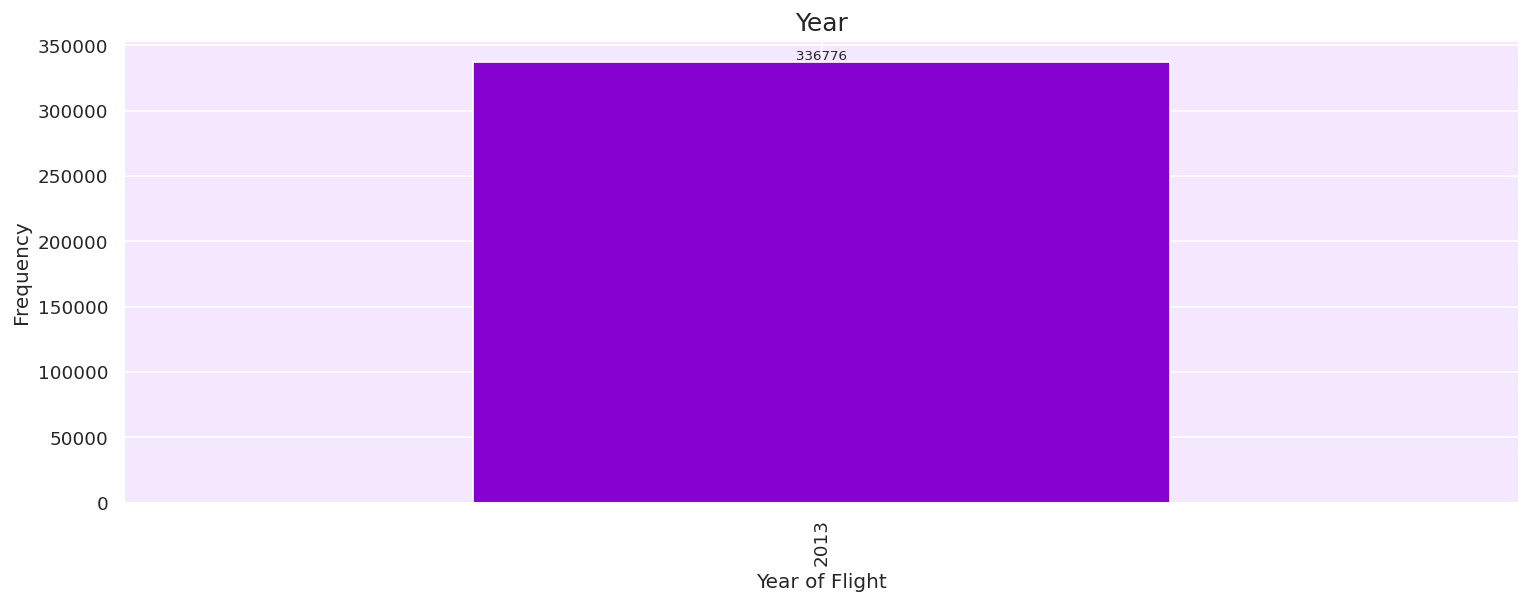

In [ ]:
# The year in which the flight took place. The dataset includes flights from the year 2013.
plot_bar(df['year'], 'Year', 'Year of Flight')

The dataset contains flight data for only one year (__2013__), so the bar plot only has one bar.

 month</span></b>

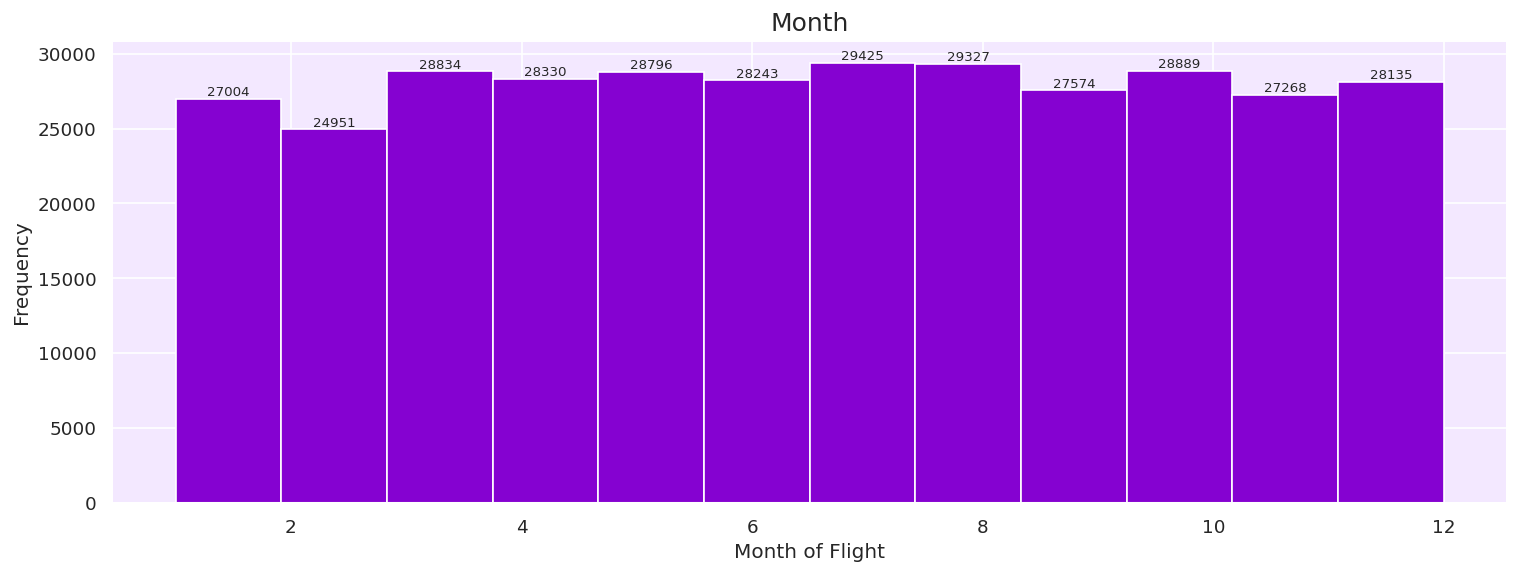

In [ ]:
# The month of the year in which the flight occurred, represented by an integer ranging from 1 (January) to 12 (December).
plot_hist(df['month'], bins=12, title='Month', xlabel='Month of Flight')

The histogram shows that the distribution of flights across different months is approximately uniform, with __a slight decrease in February__, which is likely due to the fewer number of days in that month.

Day

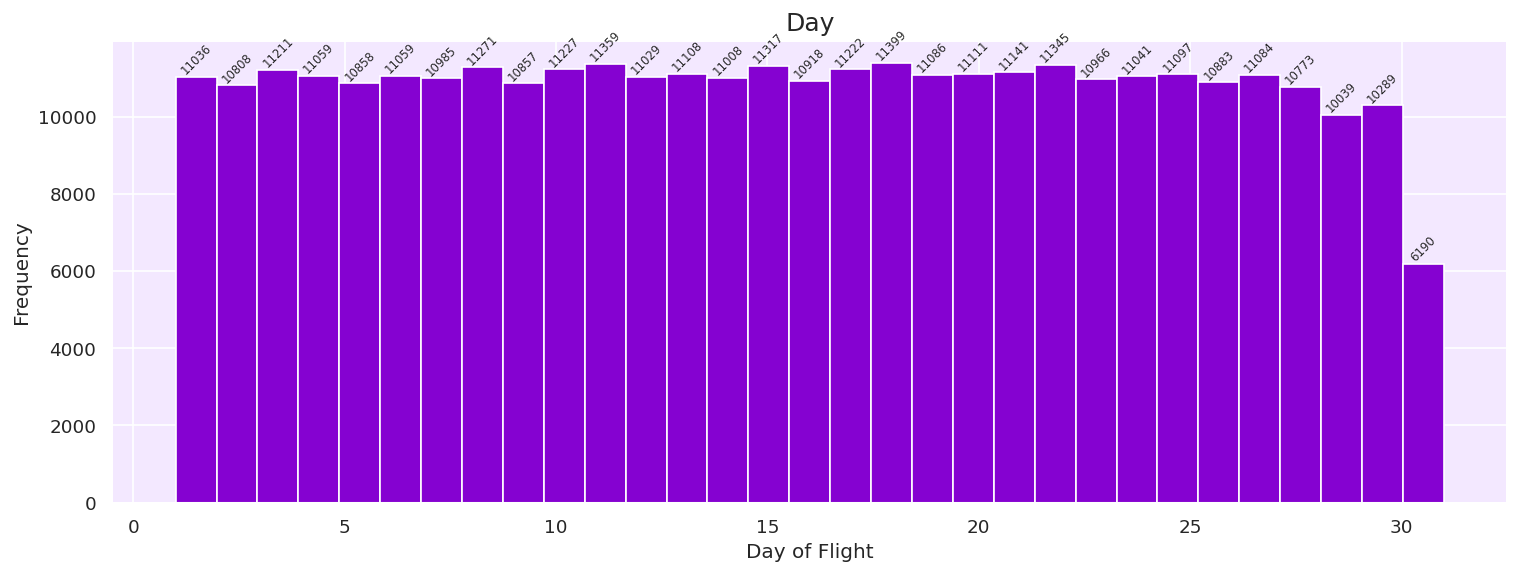

In [ ]:
# The day of the month on which the flight took place, represented by an integer from 1 to 31.
plot_hist(df['day'], bins=31, title='Day', xlabel='Day of Flight', fontsize=7, rotation=45)

The histogram reveals a mostly uniform distribution of flights across the days of the month, with slight decreases at the end of the month. These decreases are due to some months having fewer than 31 days.

dep_time

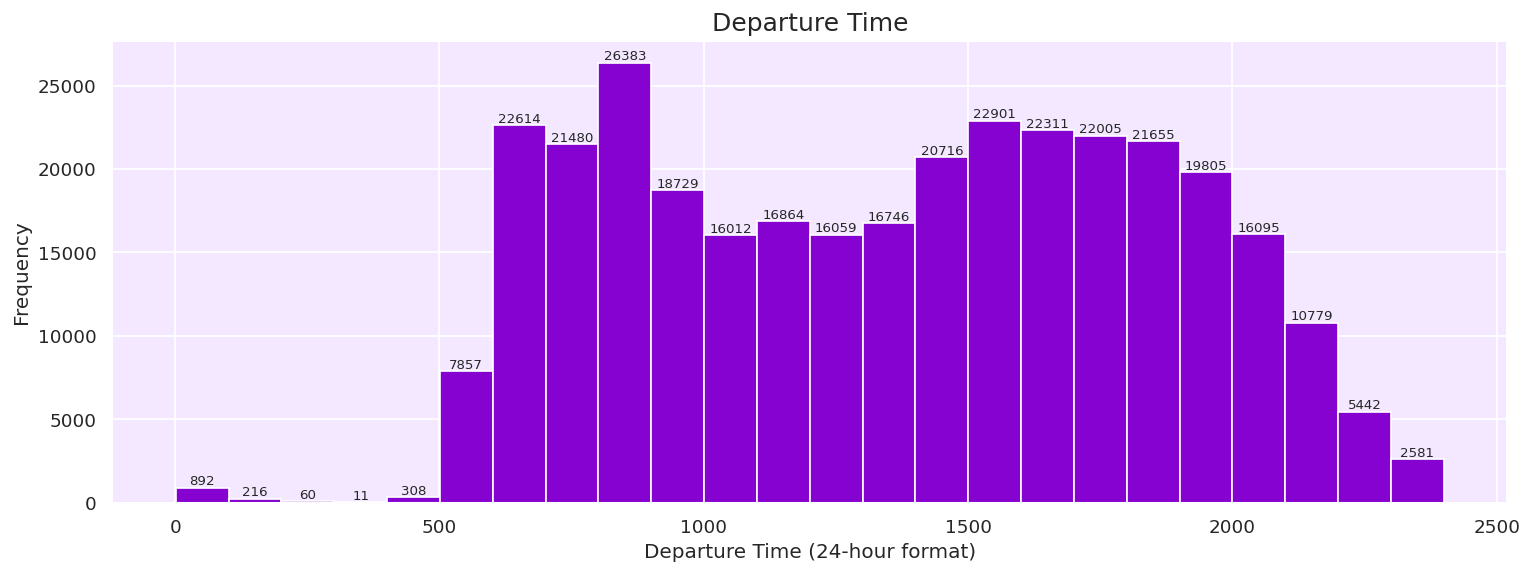

In [ ]:
plot_hist(df['dep_time'].dropna(), bins=24, title='Departure Time', xlabel='Departure Time (24-hour format)')

The histogram shows __a bimodal distribution__, indicating two peak periods for flight departures. The first peak occurs in the morning around __06:00 hours__, and the second peak occurs in the evening around __18:00 hours__. There are fewer flights at night from 23:00 to 04:00 hours.

sched_dep_time</span></b>

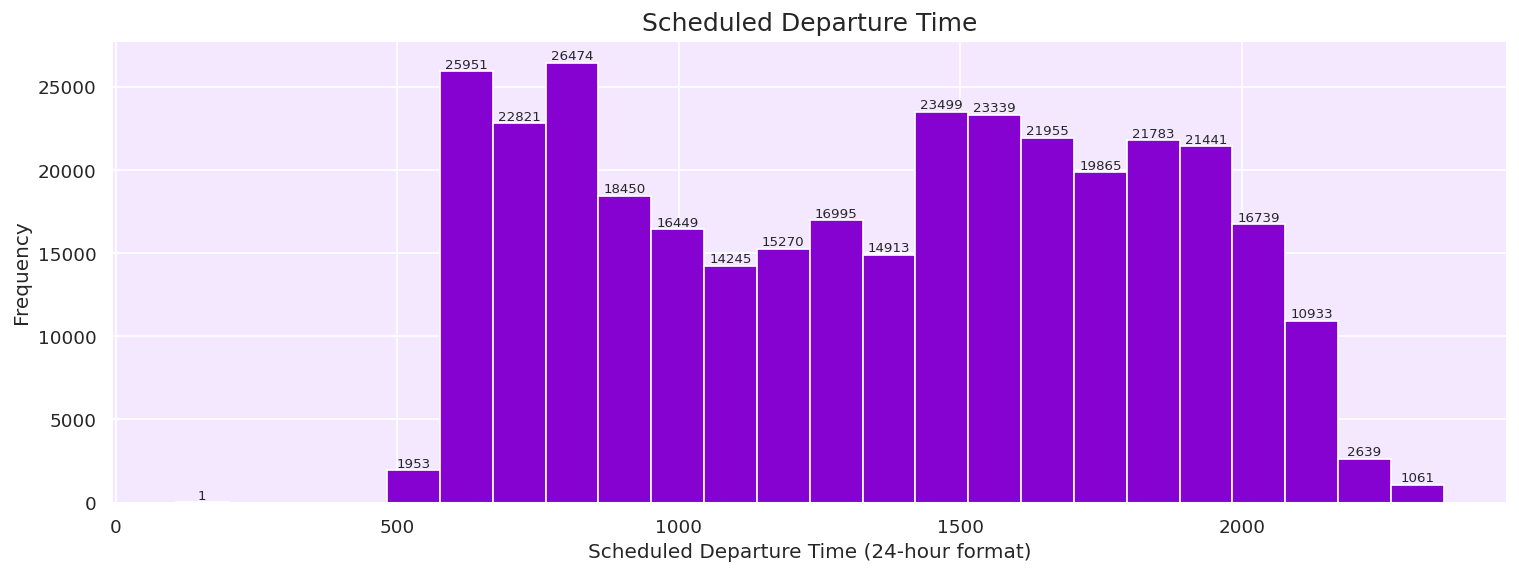

In [ ]:
# The locally scheduled departure time of the flight, presented in a 24-hour format (hhmm).
plot_hist(df['sched_dep_time'], bins=24, title='Scheduled Departure Time', xlabel='Scheduled Departure Time (24-hour format)')

This histogram is similar to the departure time histogram. It also shows two peak periods for scheduled flight departures, which are the same as the actual departure times.

dep_delay</span></b>

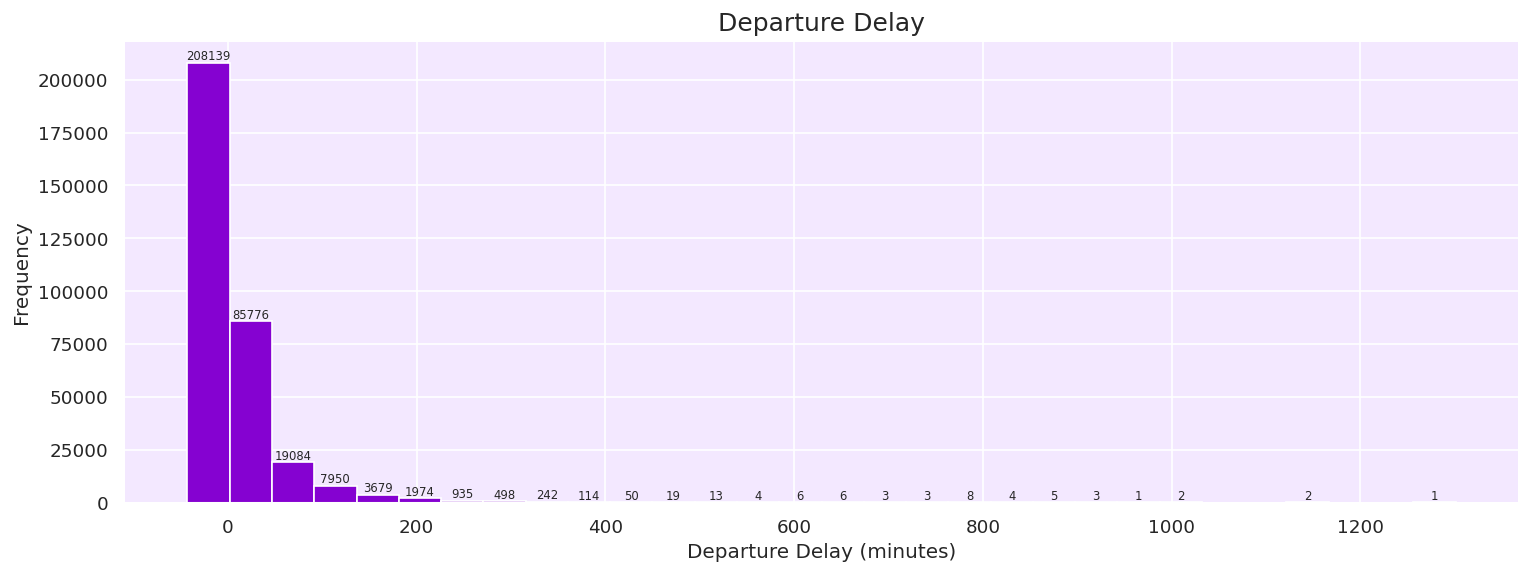

In [ ]:
# The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times.
# Positive values indicate a delay, while negative values indicate an early departure.
plot_hist(df['dep_delay'].dropna(), bins=30, title='Departure Delay', xlabel='Departure Delay (minutes)', fontsize=7)

The histogram indicates that most flights depart close to their scheduled departure time, as the peak of the distribution is around zero. However, there are also many flights with departure delays, shown by the long tail to the right of the distribution.

arr_time</span></b>

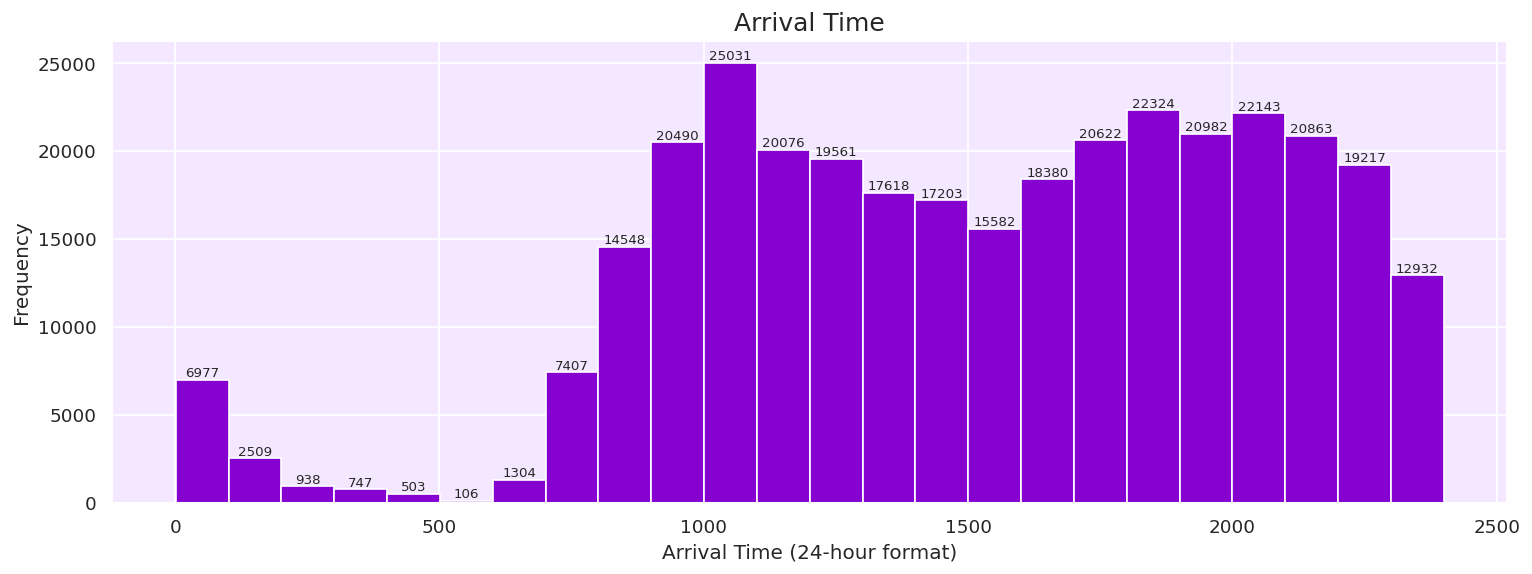

In [ ]:
# The actual arrival time of the flight, represented in 24-hour format (hhmm).
plot_hist(df['arr_time'].dropna(), bins=24, title='Arrival Time', xlabel='Arrival Time (24-hour format)')


The histogram shows a bimodal distribution, indicating two peak periods for flight arrivals. These are similar to the peak periods for flight departures.

sched_arr_time</span></b>

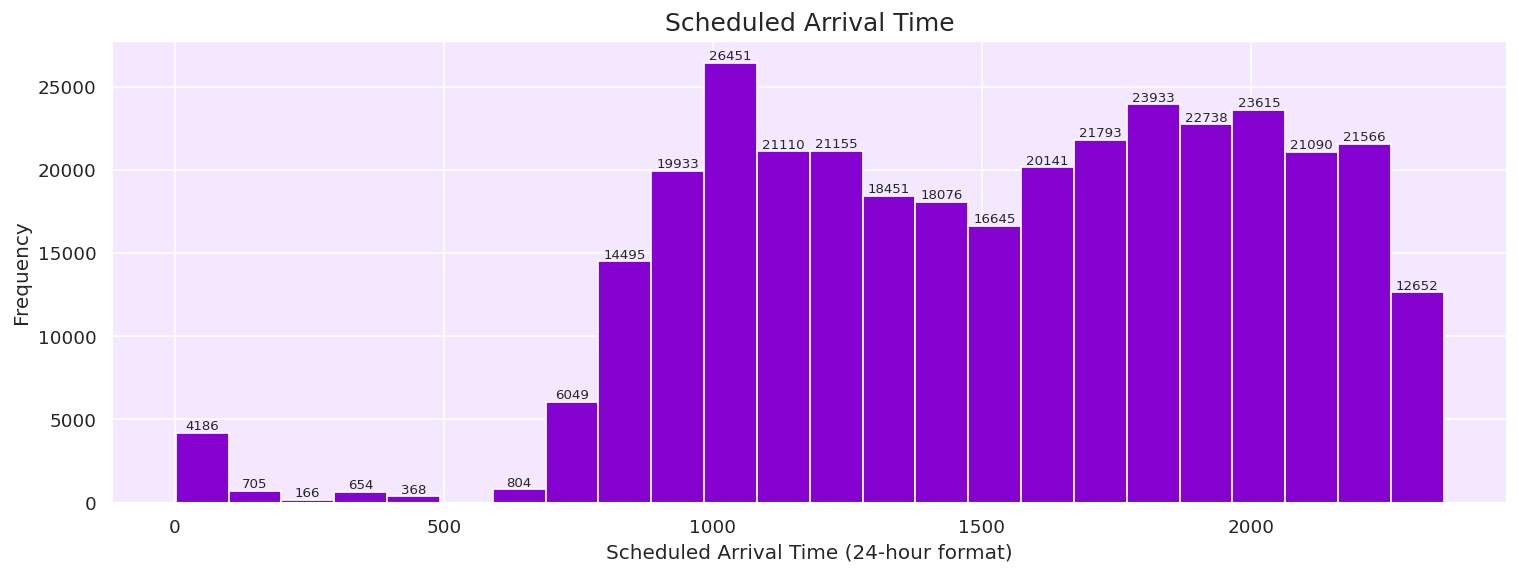

In [ ]:
# The locally scheduled arrival time of the flight, presented in a 24-hour format (hhmm).
plot_hist(df['sched_arr_time'], bins=24, title='Scheduled Arrival Time', xlabel='Scheduled Arrival Time (24-hour format)')

This histogram is similar to the arrival time histogram, indicating that the scheduling is consistent with the actual times.

arr_delay</span></b>

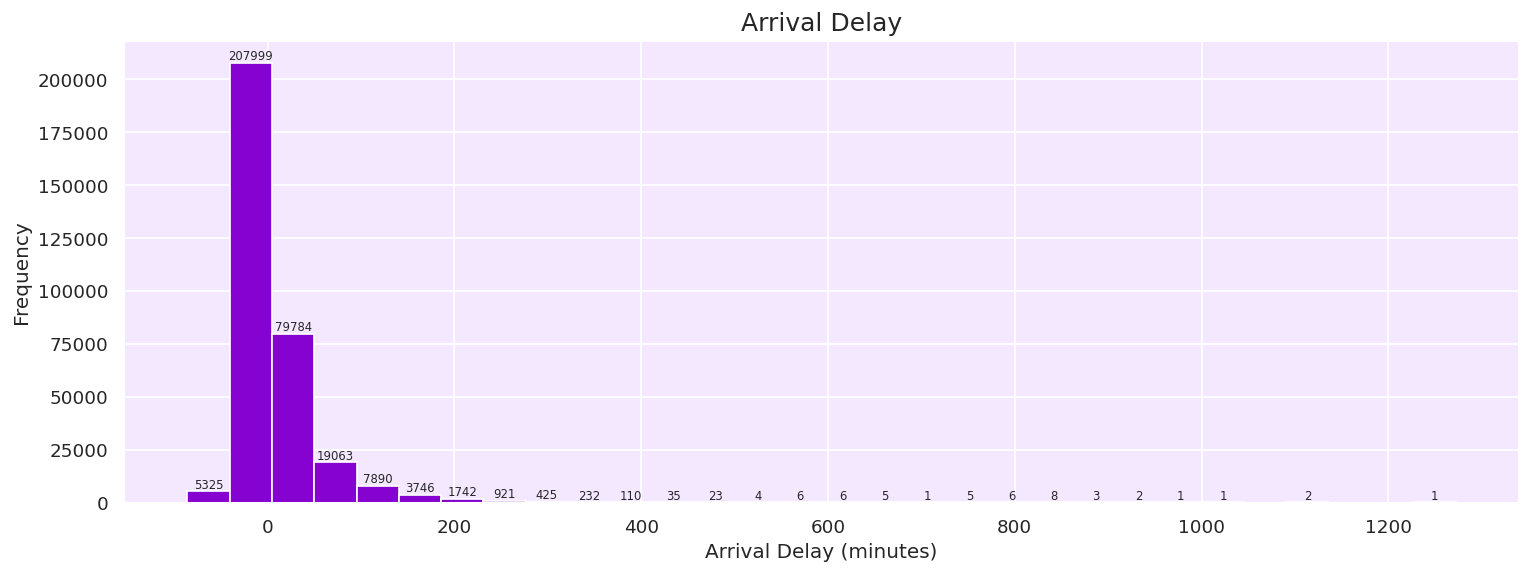

In [ ]:
# The delay in flight arrival, calculated as the difference (in minutes) between the actual and scheduled arrival times.
# Positive values indicate a delay, while negative values indicate an early arrival.
plot_hist(df['arr_delay'].dropna(), bins=30, title='Arrival Delay', xlabel='Arrival Delay (minutes)', fontsize=7)

The histogram shows that most flights arrive close to their scheduled arrival time, as the peak of the distribution is around zero. However, there are also many flights with arrival delays, shown by the long tail to the right of the distribution.

carrier</span></b>

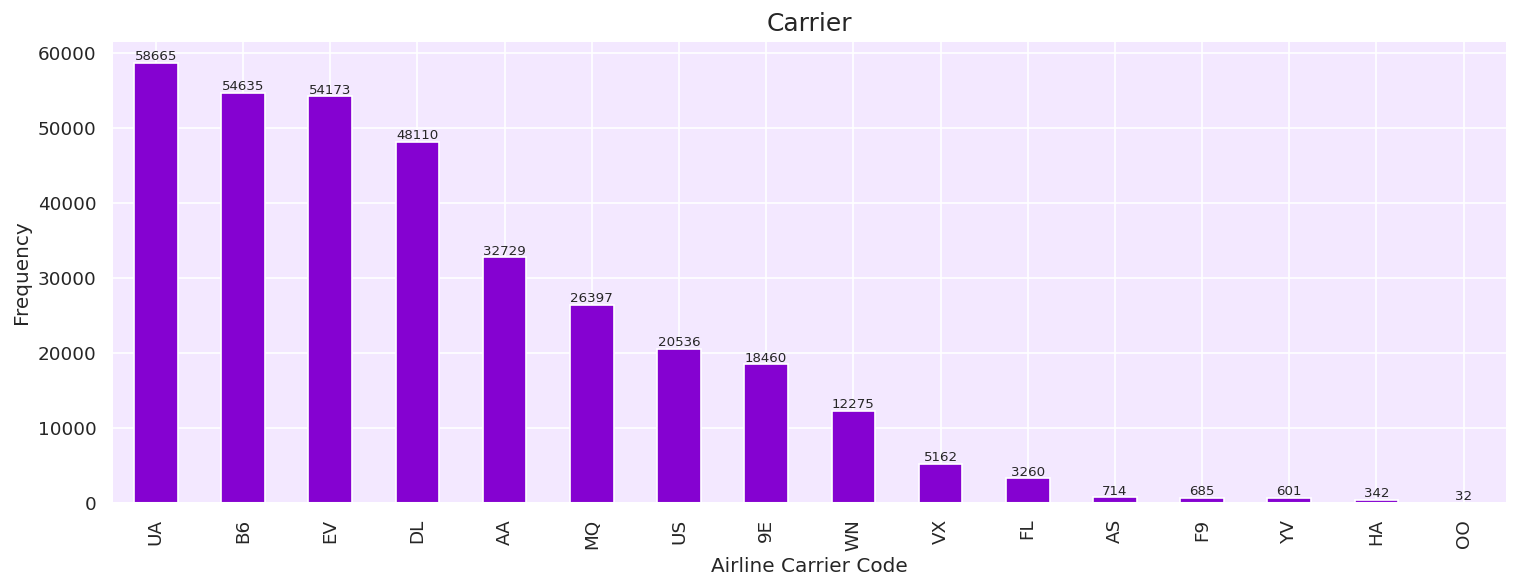

In [ ]:
# A two-letter code representing the airline carrier responsible for the flight.
plot_bar(df['carrier'], 'Carrier', 'Airline Carrier Code')

The bar plot shows that the carriers with the codes __UA__, __B6__, __EV__, and __DL__ operate the most flights in this dataset.


origin</span></b>

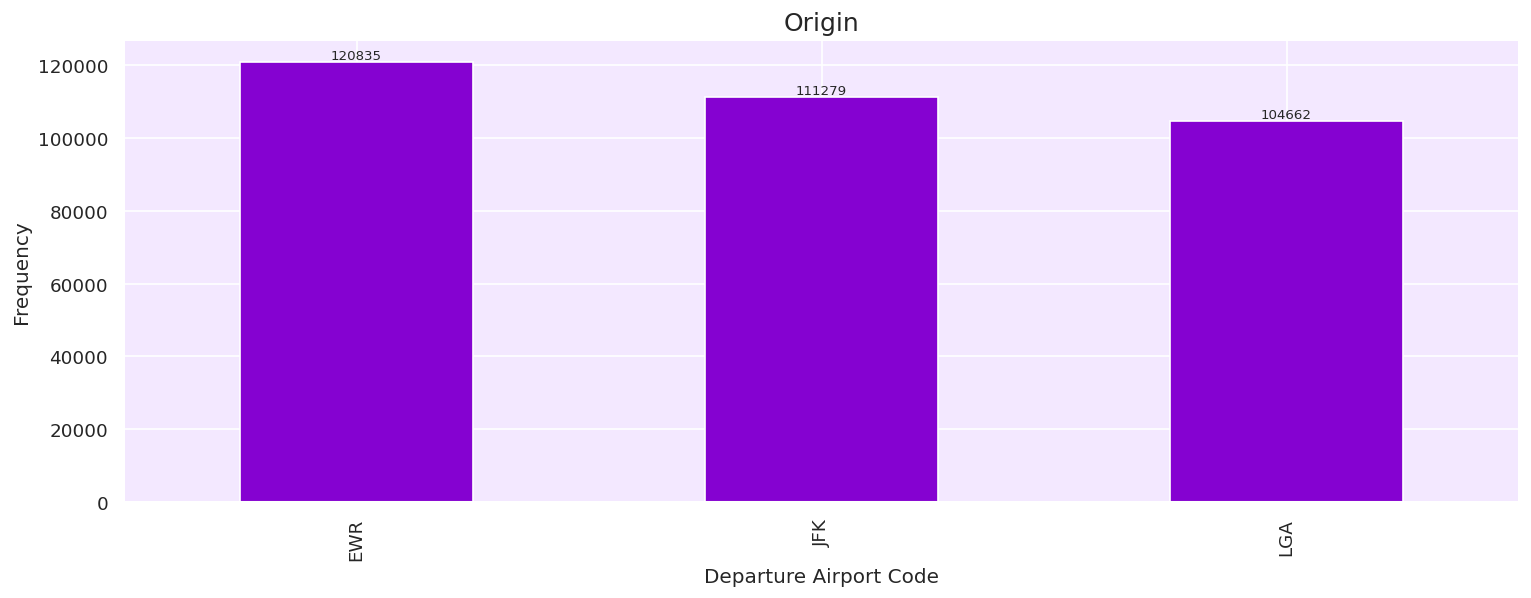

In [ ]:
# A three-letter code signifying the airport from which the flight departed.
plot_bar(df['origin'], 'Origin', 'Departure Airport Code')

The bar plot reveals that the majority of flights in this dataset depart from the airport with the code __EWR__.

dest</span></b>

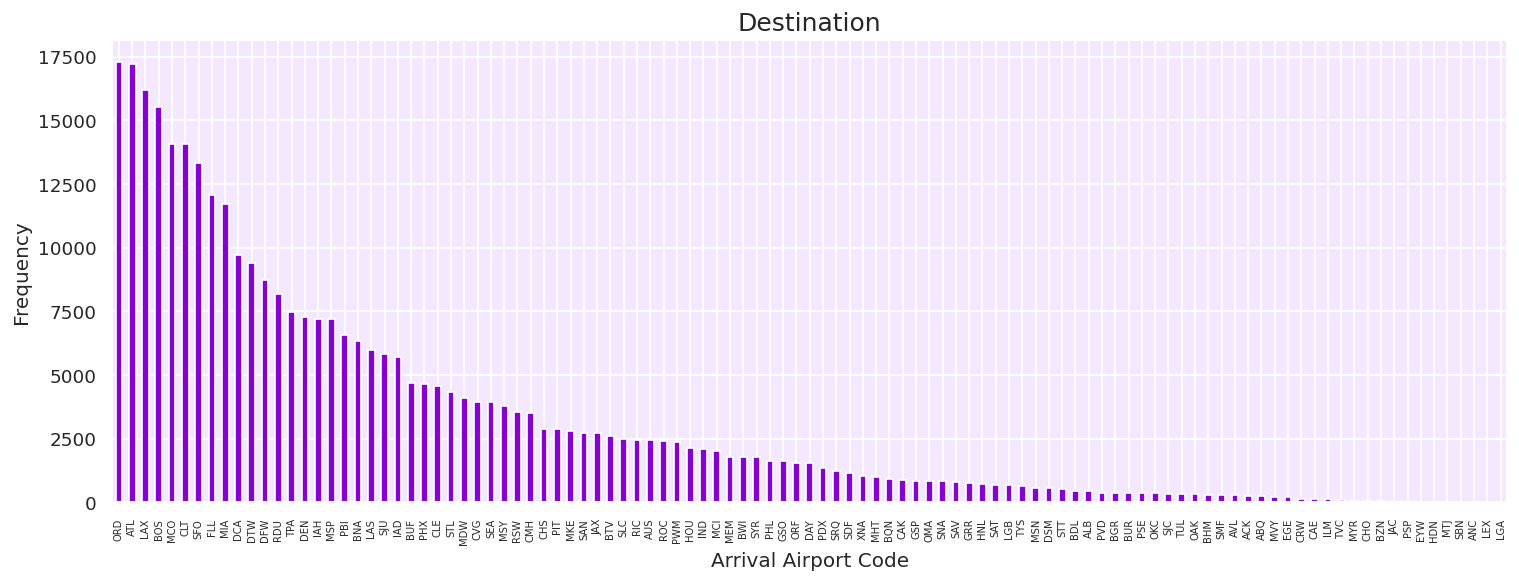

In [ ]:
# A three-letter code representing the airport at which the flight arrived.
plt.figure(figsize=(15,5))
df['dest'].value_counts().plot(kind='bar', color=color)
plt.title('Destination', fontsize=15)
plt.xlabel('Arrival Airport Code', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=6)
plt.show()

The bar plot shows that the most common destination airports are __ORD__, __ATL__, and __LAX__.

air_time</span></b>

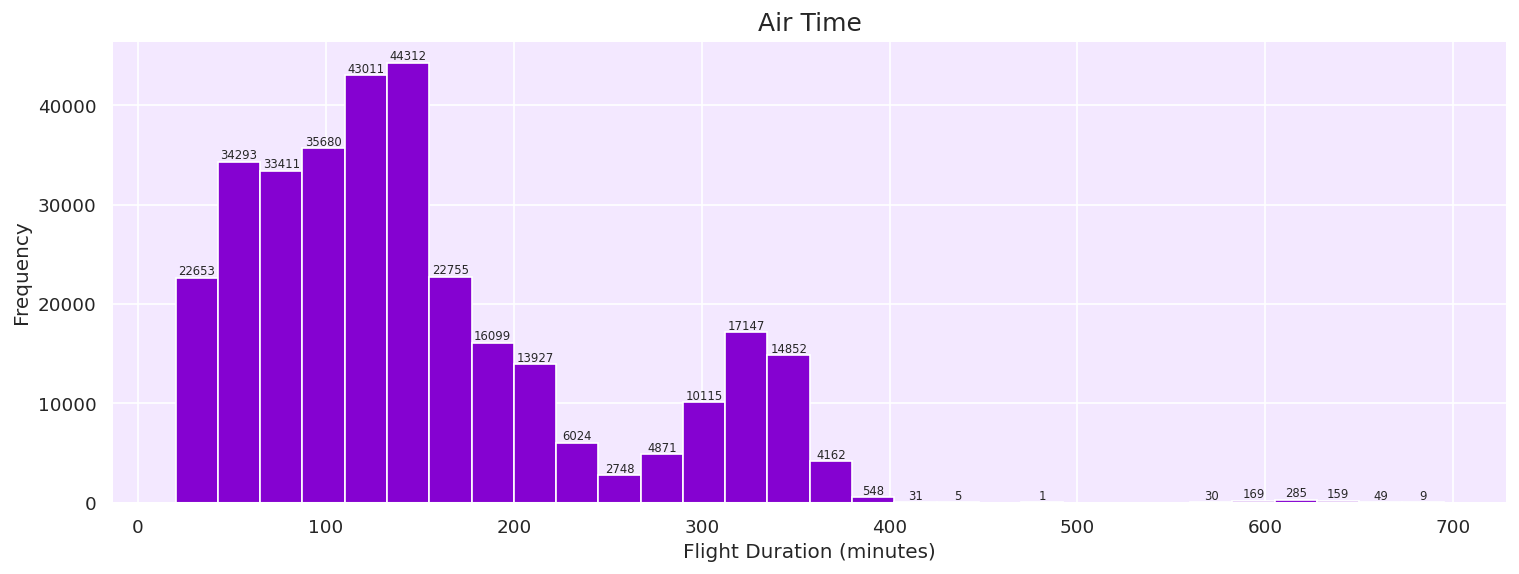

In [ ]:
# The duration of the flight, measured in minutes.
plot_hist(df['air_time'].dropna(), bins=30, title='Air Time', xlabel='Flight Duration (minutes)', fontsize=7)

The histogram shows that most flights have an air time of around 50 to 200 minutes, with a few flights having significantly longer air times.

distance</span></b>

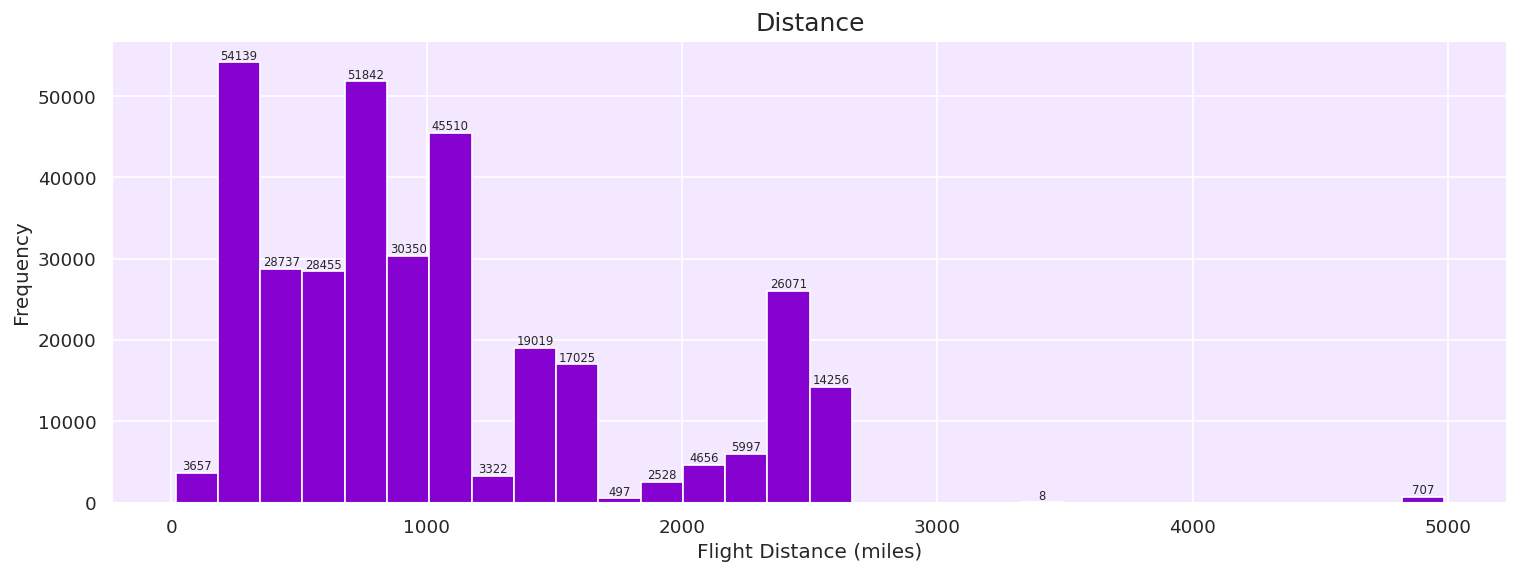

In [ ]:
# The total distance (in miles) between the origin and destination airports.
plot_hist(df['distance'], bins=30, title='Distance', xlabel='Flight Distance (miles)', fontsize=7)

The histogram shows that most flights travel a distance of around 500 to 1000 miles, with a few flights traveling significantly longer distances.    

hour

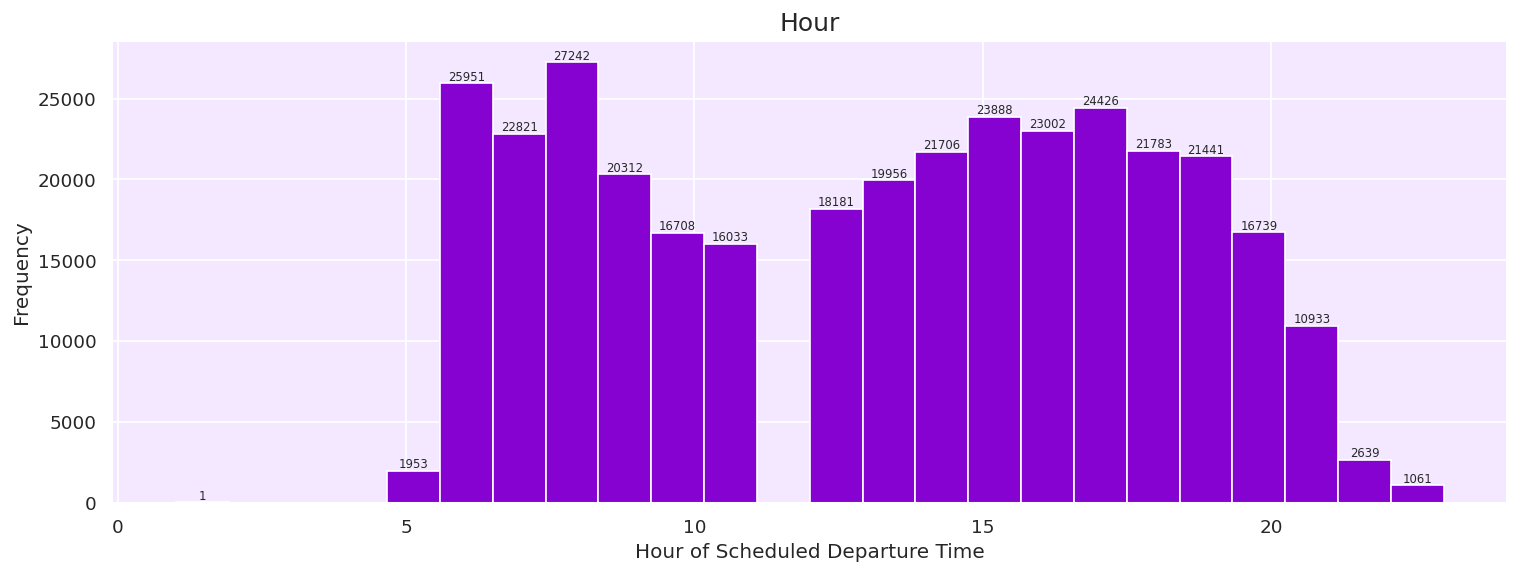

In [ ]:
# The hour component of the scheduled departure time, expressed in local time.
plot_hist(df['hour'], bins=24, title='Hour', xlabel='Hour of Scheduled Departure Time', fontsize=7)

he histogram reveals two peak periods for the hour component of the scheduled departure time, which correspond to the morning and evening peaks observed in the departure time histograms.    

minute

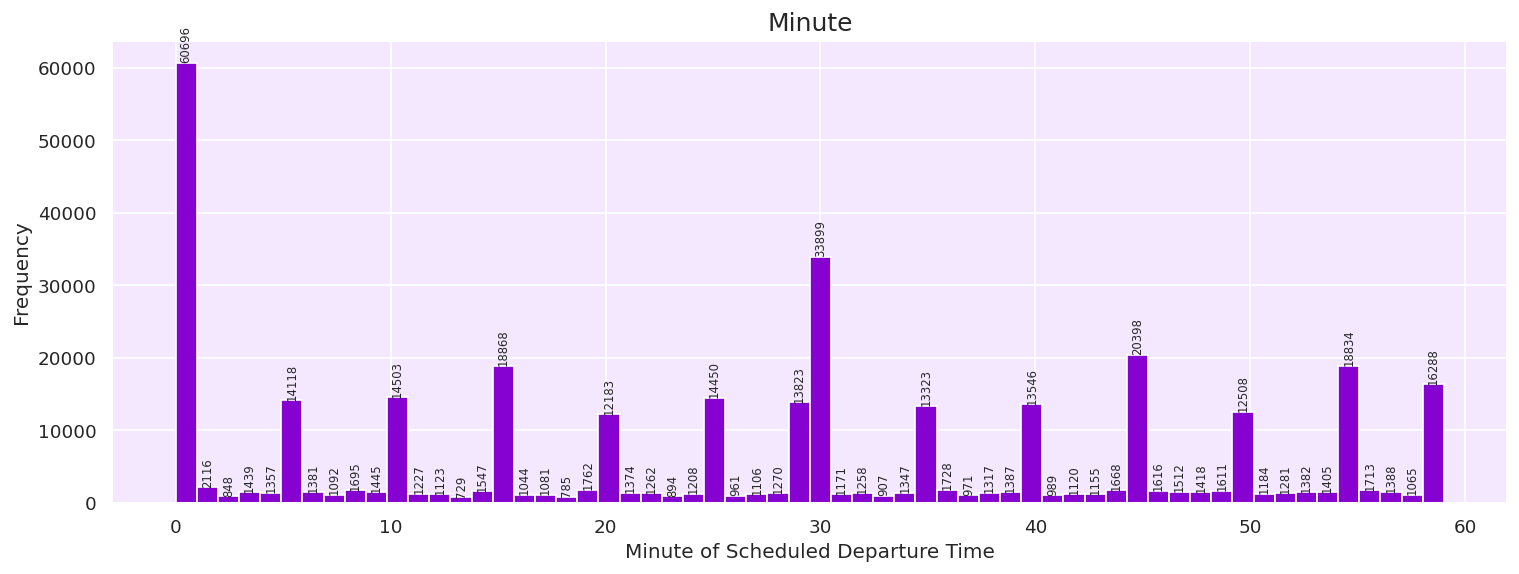

In [ ]:
# The minute component of the scheduled departure time, expressed in local time.
plot_hist(df['minute'], bins=60, title='Minute', xlabel='Minute of Scheduled Departure Time', fontsize=7, rotation=90)

    
The histogram shows almost a uniform distribution for the minute component of the scheduled departure time, indicating that flights are evenly scheduled across all minutes of an hour.

name

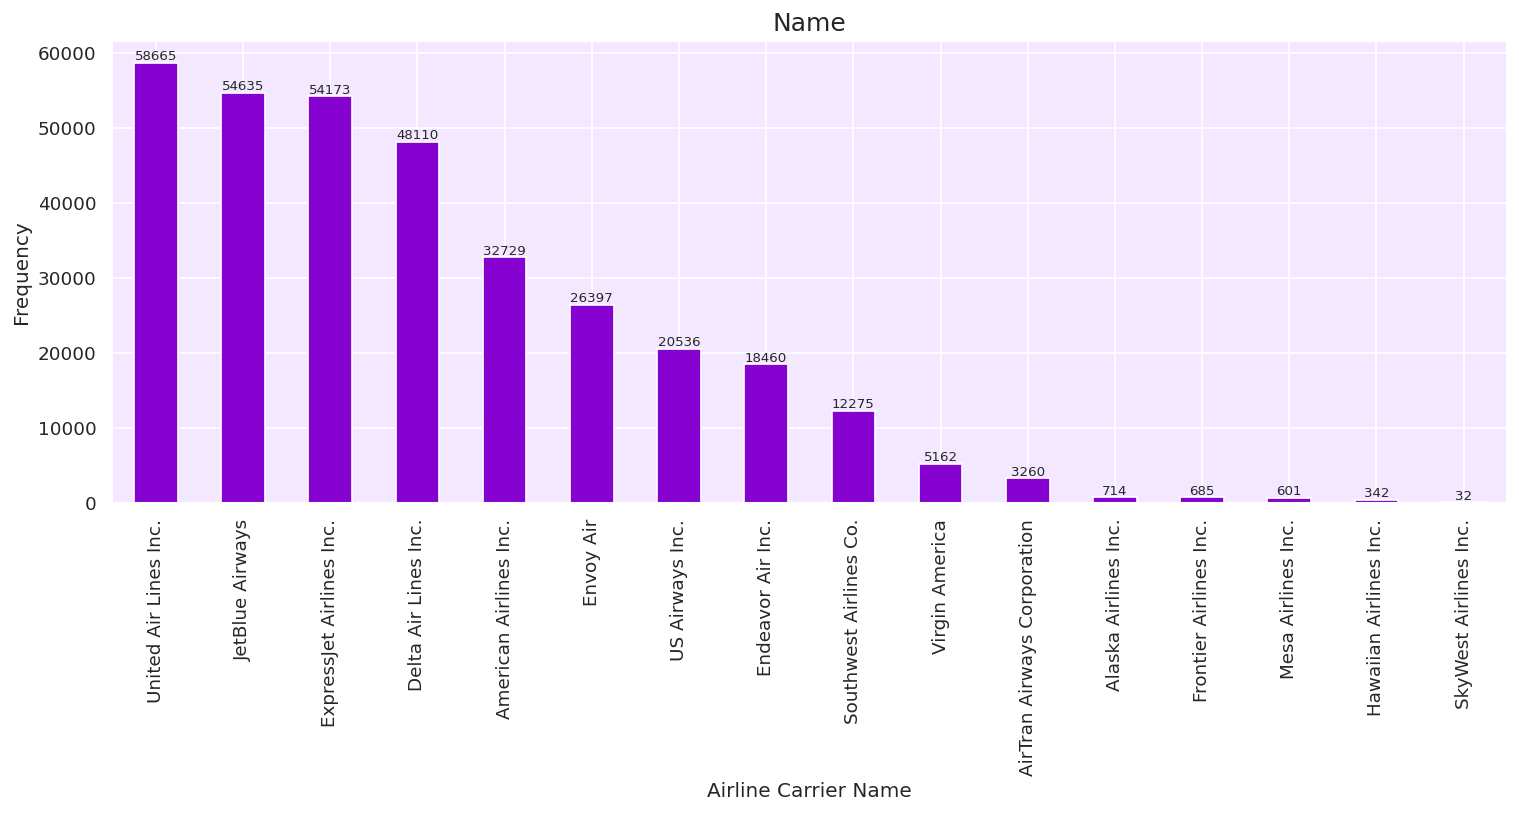

In [ ]:
# The full name of the airline carrier responsible for the flight.
plot_bar(df['name'], 'Name', 'Airline Carrier Name')

The bar plot shows that __United Air Lines Inc.__, __JetBlue Airways__, and __ExpressJet Airlines Inc.__ are the airlines that operate the most flights in this dataset.


* Since `id`, `flight`, `tailnum` are just __unique identifiers__ (__containing many unique values__) for each flight and does not provide any meaningful information, we skipped plotting them.
    
* The `time_hour` (scheduled departure time of the flight), represented in local time and formatted as __yyyy-mm-dd hh:mm:ss__. This column contains datetime information which is already represented by the `year`, `month`, `day`, `hour`, and `minute` columns, so we skipped plotting it as well.


Bivariate Analysis


<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">
    
For our bivariate analysis, we'll consider the `arr_delay` column as the __target__. We can analyze the relationship between `arr_delay` and other columns. To do this, we can use __scatter plots__ for __numerical columns__ and __violin plots__ for __categorical columns__. We skip `id`, `flight`, `tailnum`, `time_hour` as they are identifiers or contain redundant information.

In [ ]:
# Define color palette with different shades of color #8502d1 for boxplots
colors_box = sns.dark_palette("#8502d1", as_cmap=False)

# Define colormap with different shades of color #8502d1 for scatter plots
colors_scatter = sns.dark_palette("#8502d1", as_cmap=True)

# Define the function to plot scatter plots
def plot_scatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    plt.scatter(x, y, c=y, cmap=colors_scatter, s=2)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.colorbar(label=ylabel)
    plt.show()



Year vs Arrival Delay

The violin plot shows that the distribution of arrival delays varies by month. Some months (like __June__, __July__, and __December__) have wider distributions, indicating a higher variability in arrival delays.

Departure Time vs Arrival Delay

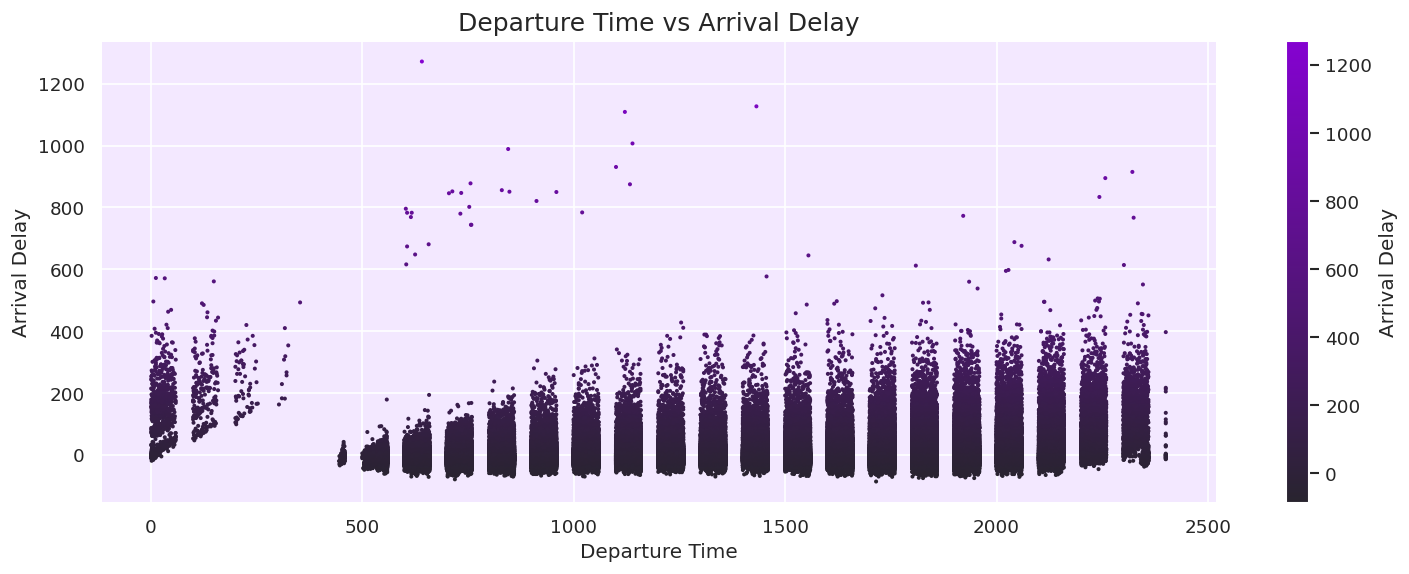

In [ ]:
# dep_time vs arr_delay
plot_scatter(df['dep_time'], df['arr_delay'], 'Departure Time vs Arrival Delay', 'Departure Time', 'Arrival Delay')

The scatter plot shows a slight trend indicating that flights departing later in the day tend to have more delays.

Scheduled Departure Time vs Arrival Delay

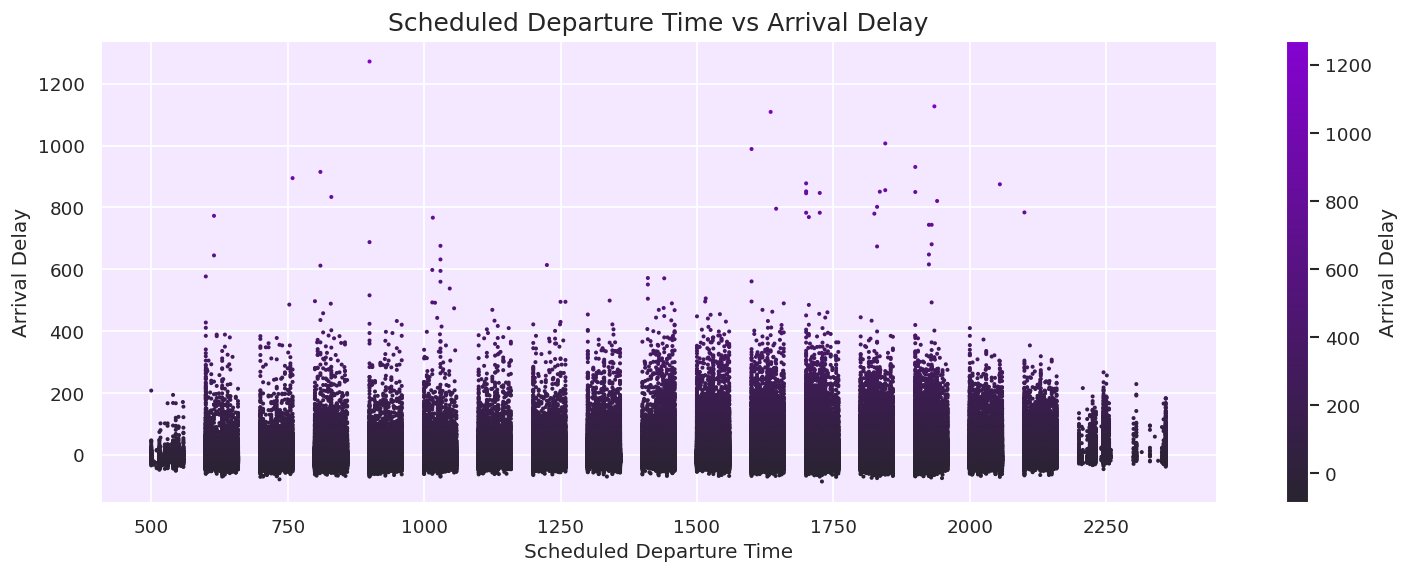

In [ ]:
# sched_dep_time vs arr_delay
plot_scatter(df['sched_dep_time'], df['arr_delay'], 'Scheduled Departure Time vs Arrival Delay', 'Scheduled Departure Time', 'Arrival Delay')

This plot shows a similar pattern to the previous one, indicating that flights scheduled to depart later in the day tend to have more delays.

Departure Delay vs Arrival Delay

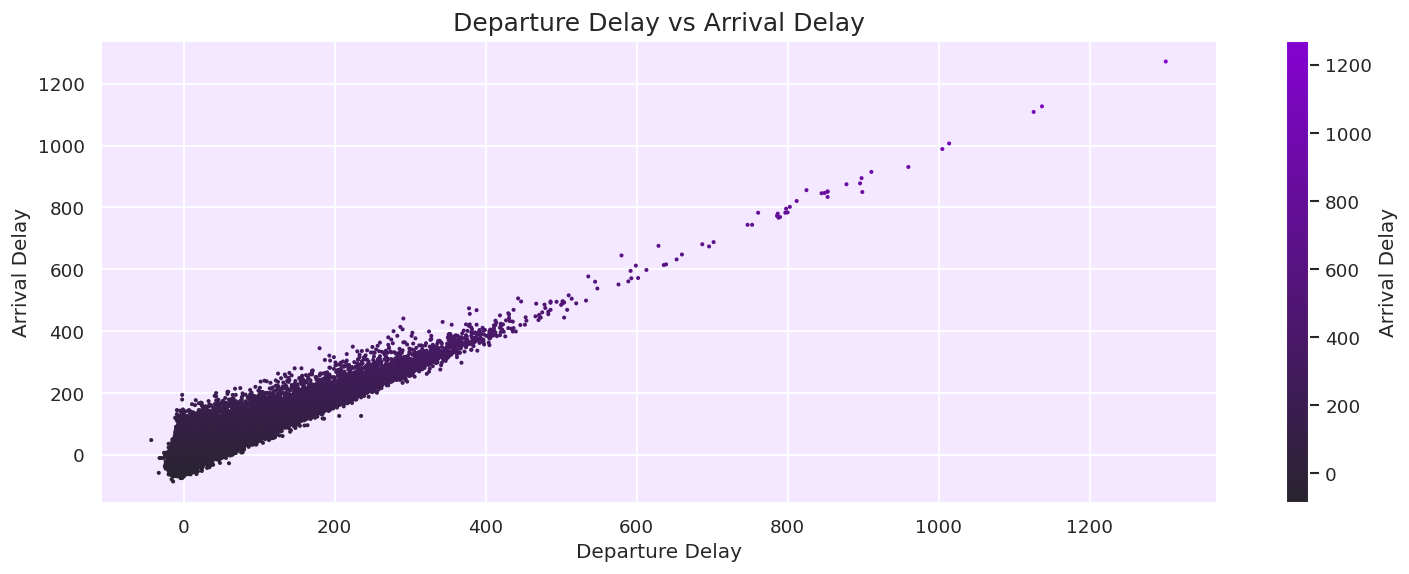

In [ ]:
# dep_delay vs arr_delay
plot_scatter(df['dep_delay'], df['arr_delay'], 'Departure Delay vs Arrival Delay', 'Departure Delay', 'Arrival Delay')

As expected, there is a strong positive correlation between departure delay and arrival delay.

Arrival Time vs Arrival Delay

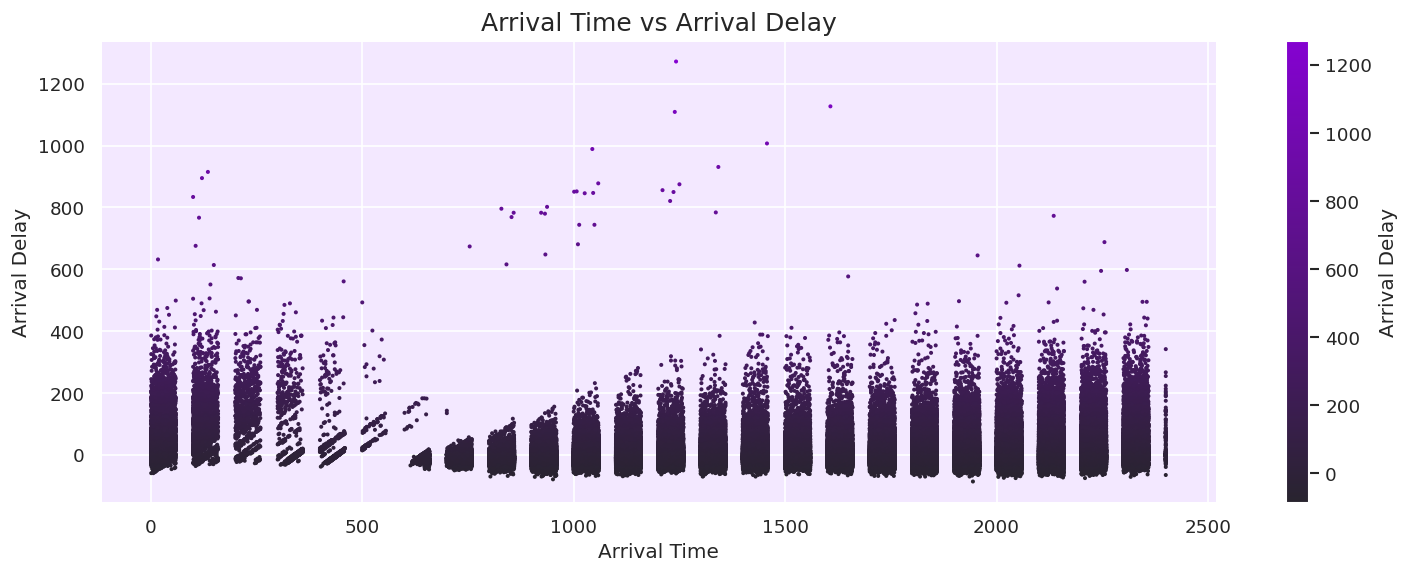

In [ ]:
# arr_time vs arr_delay
plot_scatter(df['arr_time'], df['arr_delay'], 'Arrival Time vs Arrival Delay', 'Arrival Time', 'Arrival Delay')

The scatter plot shows that flights arriving later in the day tend to have more delays, which is consistent with the departure time observations.

Scheduled Arrival Time vs Arrival Delay

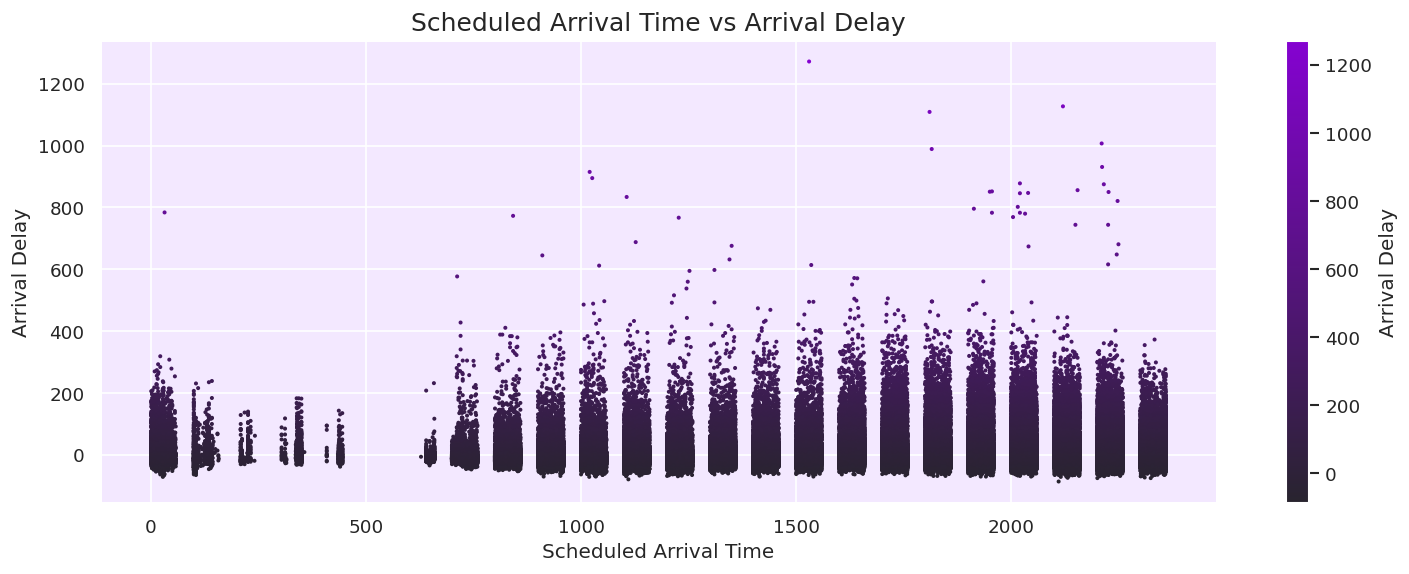

In [ ]:
# sched_arr_time vs arr_delay
plot_scatter(df['sched_arr_time'], df['arr_delay'], 'Scheduled Arrival Time vs Arrival Delay', 'Scheduled Arrival Time', 'Arrival Delay')

This plot also shows that flights scheduled to arrive later in the day tend to have more delays.

Air Time vs Arrival Delay

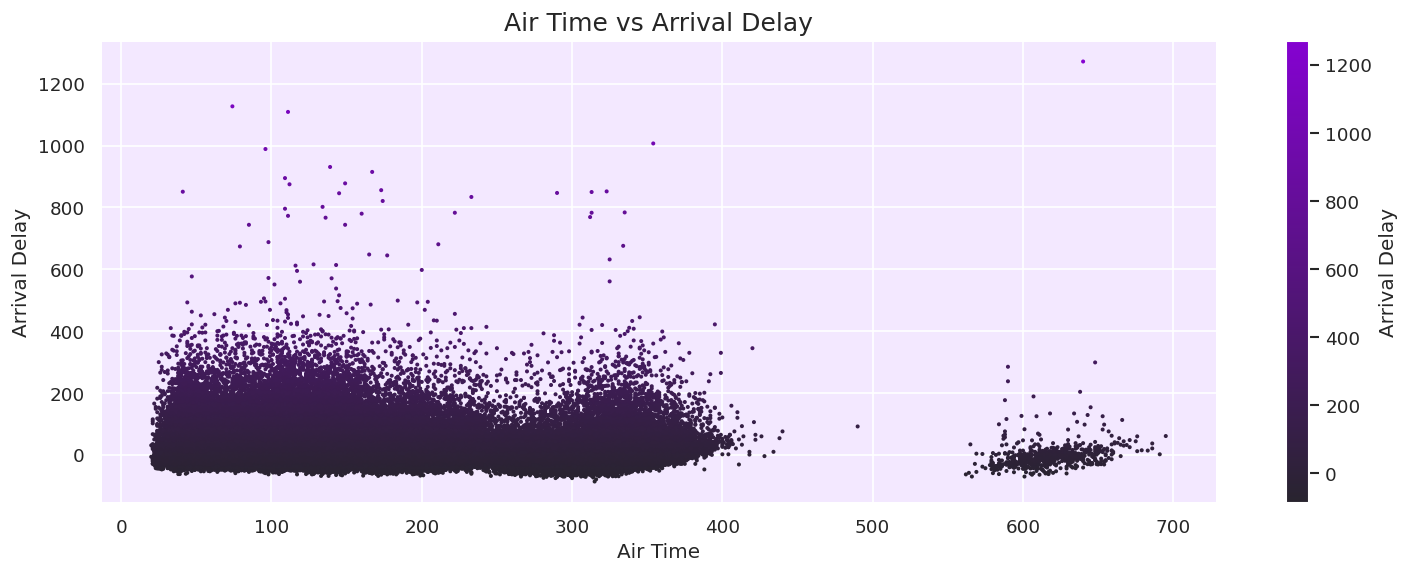

In [ ]:
# air_time vs arr_delay
plot_scatter(df['air_time'], df['arr_delay'], 'Air Time vs Arrival Delay', 'Air Time', 'Arrival Delay')

The scatter plot does not show a clear trend, suggesting that the duration of the flight (air_time) does not have a significant impact on the arrival delay.

 Distance vs Arrival Delay


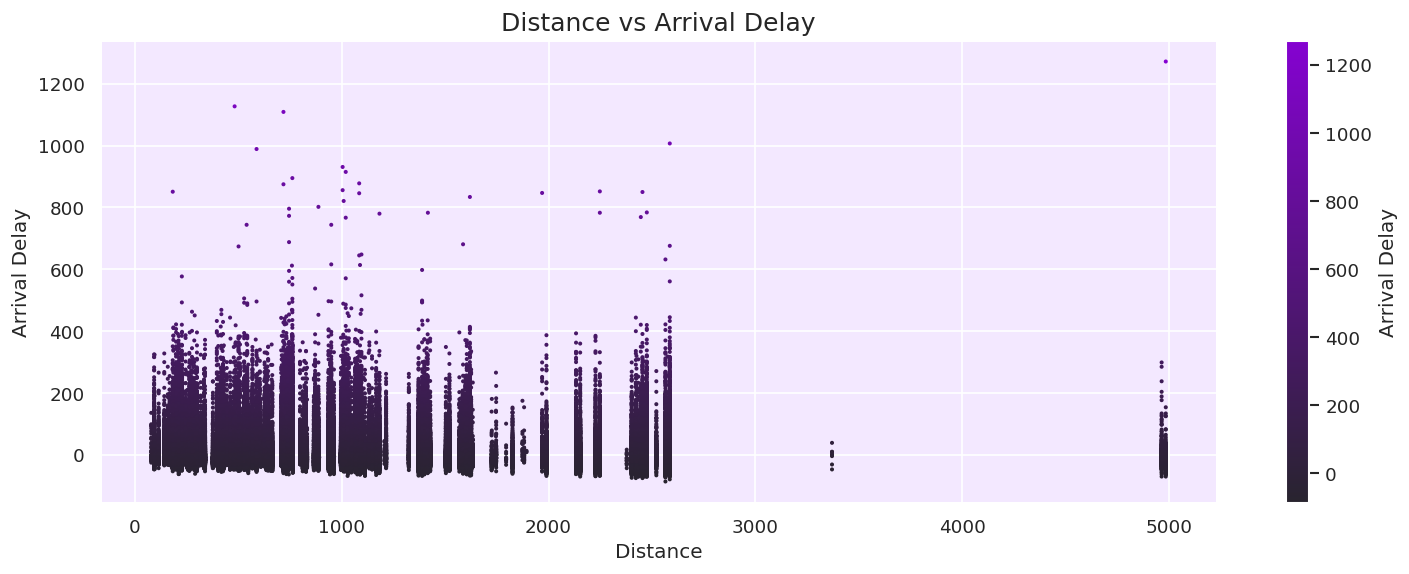

In [ ]:
# distance vs arr_delay
plot_scatter(df['distance'], df['arr_delay'], 'Distance vs Arrival Delay', 'Distance', 'Arrival Delay')

This plot also does not show a clear trend, indicating that the distance of the flight does not have a significant impact on the arrival delay.

Based on the bivariate analysis, the features that have a __noticeable impact on arrival delay__ are:

- Month
- Departure Time and Scheduled Departure Time
- Departure Delay
- Arrival Time and Scheduled Arrival Time
- Carrier
- Origin
- Destination
- Hour

On the other hand, the following features __do not__ seem to significantly __influence arrival delay__:

- Day
- Air Time
- Distance
- Minute

Data Preprocessing

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">

Data preprocessing is a crucial step in any machine learning project. It involves cleaning and transforming raw data into a format that can be understood by machine learning algorithms.

Irrelevant Feature Removal


After exploring the data, I decided to drop some columns that weren’t useful for analysis or modeling:

---

### **`id`**
- Just a unique ID for each flight.
- Doesn’t help the model learn anything — so I removed it.

---

### **`year`**
- All flights are from 2013 only.
- Since it’s the same for every row, it doesn’t add any value.

---

### **`flight`**
- Shows the flight number.
- Too many unique values (3,800+), which can confuse the model or cause overfitting.
- So it’s better to drop it.

---

### **`tailnum`**
- Unique ID for each aircraft.
- Again, too many unique values (4,000+).
- Could lead to overfitting, so I removed it too.

---

### **`time_hour`**
- Full date and time of departure.
- We already have other columns like `year`, `month`, `day`, and `sched_dep_time` that give the same info.
- So this one is redundant.

---

### **`minute`**
- Minute part of the departure time.
- It’s already included in `sched_dep_time`, so I dropped it.

---

### **`hour`**
- Same reason as `minute`. It’s already part of `sched_dep_time`.

---

### **`carrier`**
- Short 2-letter airline code.
- We also have the full airline name in the `name` column, which is easier to understand.
- So I kept `name` and removed `carrier`.


In [ ]:
df.drop(['id', 'year', 'flight', 'tailnum', 'time_hour', 'minute', 'hour', 'carrier'], axis=1, inplace=True)

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">
    
Let us check the list of remaining features:

In [ ]:
df.columns

Index(['month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time',
       'sched_arr_time', 'arr_delay', 'origin', 'dest', 'air_time', 'distance',
       'name'],
      dtype='object')

Missing Value Treatment

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">
    
__Missing data__ can disrupt many machine learning algorithms. It's crucial to handle these appropriately. Depending on the nature of the data and the percentage of missing values, we can:

* Drop the rows or columns with missing data, especially if the percentage of missing data is very high.
* Fill the missing data with a central tendency measure (mean, median, or mode).
* Predict the missing values using a machine learning algorithm like KNN.
* Use algorithms that can handle missing values.

In [ ]:
# Check the percentage of missing values in each column
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Columns:\n", round(missing_percent,2))

Missing Value Percentage by Columns:
 arr_delay         2.80
air_time          2.80
arr_time          2.59
dep_delay         2.45
dep_time          2.45
sched_dep_time    0.00
day               0.00
month             0.00
sched_arr_time    0.00
origin            0.00
dest              0.00
distance          0.00
name              0.00
dtype: float64


<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">

Some of the missing values belong to the __target column__ (__`arr_delay`__). So, first I am going to drop rows with missing target values (`arr_delay`) to avoid introducing bias into our model. This is because we want our model to learn from actual observations, not from imputed values:

In [ ]:
df.dropna(subset=['arr_delay'], inplace=True)
df.reset_index(drop=True, inplace=True)

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">
    
Then i am using a __K-Nearest Neighbors (KNN) Imputer__ to fill in missing values in other columns. The KNN imputer is a more advanced imputation method that fills missing values based on similar observations, rather than just using the mean or median. This allows us to capture more complex patterns in the data, potentially leading to more accurate imputations:  

In [ ]:
# Separate features and target
X = df.drop(columns=['arr_delay'])
y = df['arr_delay']

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer
columns_to_impute = ['dep_time', 'dep_delay', 'arr_time', 'air_time']
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

# Check missing values again
X.isnull().sum().sum()

np.int64(0)

<Axes: xlabel='arr_delay'>

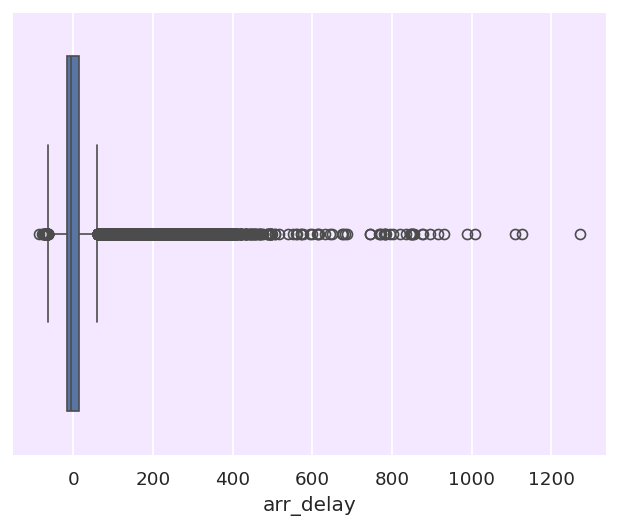

In [ ]:
sns.boxplot(x='arr_delay', data=df)

Outlier Treatment

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">

__Outliers__ are values that stand out from the rest because they're very different. They can sometimes cause problems, especially when we're doing something like __regression__, where outliers can have a big impact.

__In our flight delay data, these outliers represent the really long delays. These aren't errors or mistakes, they're a real part of flying that we want our model to learn from. So, we don't want to just throw these values away.__

But we also don't want these outliers to have too much influence. So, we use something called a __Box-Cox transformation__ later. __This is a way of adjusting our data to make the outliers less extreme, without getting rid of them.__

This way, our model can still learn from the outliers - the really long delays - but they won't have an outsized impact. And this is important because even though our model, regression, is usually sensitive to outliers, we still want it to learn from all parts of our data.

Features Encoding

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">
    
Categorical variables need to be encoded because machine learning algorithms work with numerical data and cannot directly handle text or categorical data. First of all let's identify categorical columns:

In [ ]:
# Identify categorical columns
cat_columns = X.select_dtypes(include=['object']).columns

# Check the number of unique categories in each categorical feature
X[cat_columns].nunique()

,0
origin,3
dest,104
name,16


<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">
    
We identified `origin`, `dest`, and `name` as __nominal categorical features__ (containing categories without any inherent order). Before proceeding with encoding, however, it would be helpful to check how balanced the categories are within each feature. For example, if a feature has a category that is very rarely present in the data, one-hot encoding could result in a column with mostly zeros, which might not be very informative for the model:

In [ ]:
# Check the distribution of categories within each feature
for col in cat_columns:
    print(f"\nDistribution of categories in {col}:")
    print(X[col].value_counts())


Distribution of categories in origin:
origin
EWR    117127
JFK    109079
LGA    101140
Name: count, dtype: int64

Distribution of categories in dest:
dest
ATL    16837
ORD    16566
LAX    16026
BOS    15022
MCO    13967
       ...  
MTJ       14
HDN       14
SBN       10
ANC        8
LEX        1
Name: count, Length: 104, dtype: int64

Distribution of categories in name:
name
United Air Lines Inc.          57782
JetBlue Airways                54049
ExpressJet Airlines Inc.       51108
Delta Air Lines Inc.           47658
American Airlines Inc.         31947
Envoy Air                      25037
US Airways Inc.                19831
Endeavor Air Inc.              17294
Southwest Airlines Co.         12044
Virgin America                  5116
AirTran Airways Corporation     3175
Alaska Airlines Inc.             709
Frontier Airlines Inc.           681
Mesa Airlines Inc.               544
Hawaiian Airlines Inc.           342
SkyWest Airlines Inc.             29
Name: count, dtype: int64


<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">
    
Here's what we found:

* __`name`__: The `name` column has 16 unique categories, corresponding to different airline carriers. The distribution of categories is fairly balanced.
    
* __`origin`__: The `origin` column represents the airport from which the flight departed. There are 3 unique categories in this column, corresponding to three different airports. The distribution of categories is also quite balanced.

* __`dest`__ : The `dest` column represents the airport at which the flight arrived. There are 105 unique categories in this column, which is quite high. Some destinations have many flights (like ORD, ATL, LAX), while others have very few (like LEX, LGA).

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">

Based on the above observations, here's our plan for encoding:

* __One-hot Encoding__: We can apply one-hot encoding to the `origin`, and `name` columns. These columns have relatively few categories and are fairly balanced.


* __Frequency Encoding__: This method replaces each category in the feature with its frequency (i.e., the proportion of the total number of instances it represents). It's suitable for high-cardinality categorical features and does not introduce an arbitrary order. We will use this method for the `dest` feature, as it has a large number of unique categories, and the distribution is skewed, with some categories appearing much more frequently than others.

In [ ]:
# Create a copy of the dataset for encoding
X_encoded = X.copy()

# Apply one-hot encoding to 'carrier', 'origin', and 'name'
X_encoded = pd.get_dummies(X_encoded, columns=['origin', 'name'], drop_first=True)

# Apply frequency encoding to 'dest'
dest_freq = X_encoded['dest'].value_counts() / len(X_encoded)  # calculate the frequencies
X_encoded['dest'] = X_encoded['dest'].map(dest_freq)  # map frequencies to the feature

# Show the result
X_encoded.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,dest,air_time,distance,...,name_ExpressJet Airlines Inc.,name_Frontier Airlines Inc.,name_Hawaiian Airlines Inc.,name_JetBlue Airways,name_Mesa Airlines Inc.,name_SkyWest Airlines Inc.,name_Southwest Airlines Co.,name_US Airways Inc.,name_United Air Lines Inc.,name_Virgin America
0,1,1,517.0,515,2.0,830.0,819,0.021644,227.0,1400,...,False,False,False,False,False,False,False,False,True,False
1,1,1,533.0,529,4.0,850.0,830,0.021644,227.0,1416,...,False,False,False,False,False,False,False,False,True,False
2,1,1,542.0,540,2.0,923.0,850,0.035415,160.0,1089,...,False,False,False,False,False,False,False,False,False,False
3,1,1,544.0,545,-1.0,1004.0,1022,0.002713,183.0,1576,...,False,False,False,True,False,False,False,False,False,False
4,1,1,554.0,600,-6.0,812.0,837,0.051435,116.0,762,...,False,False,False,False,False,False,False,False,False,False


</span><span style='color:#8502d1'> Time Feature Transformation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">

Time, especially when it's represented in the 24-hour format, has a cyclic nature. What this means is that 23:59 (or 2359 in the __hhmm__ format) and 00:01 (or 0001) are only two minutes apart, but if you look at their absolute difference in the __hhmm__ format, it would be 2358 units apart! This can be problematic for machine learning models that interpret numerical values in their raw form.

To address this, we can transform these time features into two dimensions using trigonometric functions, specifically __sine__ and __cosine__, to map each time to a point on a circle. This way, times that are close to each other on the 24-hour clock, such as 2359 and 0001, will also be close to each other on the circle.

____
__Example 1__: Consider the time 12:00 or 1200 in __hhmm__. This is exactly halfway through the day. If we map this onto a circle:
* The sine value would be 0 (because it's the horizontal midpoint).
* The cosine value would be 1 (the highest point on the upper circle).

    
__Example 2__: Now, for 18:00 or 1800, which is three-quarters of the way through the day:

* The sine value would be -1 (the lowest point on the bottom circle).
* The cosine value would again be 0.

By doing this transformation, we make sure times that are close on a clock are also close in the transformed feature space.

In [ ]:
# Time Feature Transformation
def transform_time(df, columns):
    for col in columns:
        df[col + '_sin'] = np.sin(2 * np.pi * df[col]/2400)
        df[col + '_cos'] = np.cos(2 * np.pi * df[col]/2400)
        df.drop(columns=col, inplace=True)
    return df

# List of 'hhmm' formatted features
time_cols = ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']

# Apply transformation
X_encoded = transform_time(X_encoded, time_cols)

X_encoded.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,1,1,2.0,0.021644,227.0,1400,False,False,False,False,...,True,False,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,1,1,4.0,0.021644,227.0,1416,False,True,False,False,...,True,False,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,1,1,2.0,0.035415,160.0,1089,True,False,False,True,...,False,False,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,1,1,-1.0,0.002713,183.0,1576,True,False,False,False,...,False,False,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,1,1,-6.0,0.051435,116.0,762,False,True,False,False,...,False,False,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


Feature scaling

 **Feature scaling** helps bring all features to a common scale, which is especially important for algorithms like KNN, SVM, and neural networks.
- To avoid **data leakage**, scaling should usually be based only on the training data — but since we're using the full dataset for training here, we scale the entire dataset.
- We apply **standard scaling (Z-score normalization)** to continuous features to center them around the mean with unit variance.
- **Frequency-encoded categorical features** are treated like continuous features, so we also apply standard scaling to them.
- We **do not scale one-hot encoded binary features or cyclic time features**, as scaling could distort their binary structure or cyclical patterns.


In [ ]:
# Define binary, cyclic, and continuous columns
binary_cols     = [col for col in X_encoded.columns if X_encoded[col].value_counts().index.isin([0,1]).all()]
cyclic_cols     = [col for col in X_encoded.columns if col.endswith('_cos') or col.endswith('_sin')]
continuous_cols = [col for col in X_encoded.columns if col not in binary_cols + cyclic_cols]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the continuous features
X_encoded[continuous_cols] = scaler.fit_transform(X_encoded[continuous_cols])

# Show the result
X_encoded.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,-1.630263,-1.679414,-0.263447,-0.290559,0.814548,0.477816,False,False,False,False,...,True,False,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,-1.630263,-1.679414,-0.213529,-0.290559,0.814548,0.499558,False,True,False,False,...,True,False,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,-1.630263,-1.679414,-0.263447,0.558148,0.099410,0.055209,True,False,False,True,...,False,False,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,-1.630263,-1.679414,-0.338324,-1.457249,0.344905,0.716977,True,False,False,False,...,False,False,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,-1.630263,-1.679414,-0.463119,1.545420,-0.370233,-0.389140,False,True,False,False,...,False,False,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


In [ ]:
continuous_cols

['month', 'day', 'dep_delay', 'dest', 'air_time', 'distance']

____
Transforming Skewed Features</span></b>

The **Box-Cox transformation** is used to make continuous and skewed features more normally distributed. Many machine learning models perform better when features resemble a Gaussian (normal) distribution.

---

###  Suitable for Box-Cox Transformation:
- **Continuous features**
- **Skewed distribution**

These features may benefit from the transformation:
- `dep_delay`
- `air_time`
- `distance`

---

### Not Suitable for Box-Cox Transformation:
- **Binary features** (e.g., 0 and 1) — already limited to two values.
- **Cyclic features** — transformed to capture cyclic patterns, not suitable for linear distribution transformations.
- **Discrete features** (e.g., `month`, `day`) — not truly continuous.

---

### Tip:  
To decide if Box-Cox is needed, use a **histogram** or **Q-Q plot** to check if the distribution is skewed. If yes, it's a good candidate for transformation.

In [ ]:

# Define the function to plot histograms with specified color
def plot_hist(column, title, xlabel, color, bins=30):
    sns.histplot(column, bins=bins, color=color, edgecolor='white', kde=True)
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

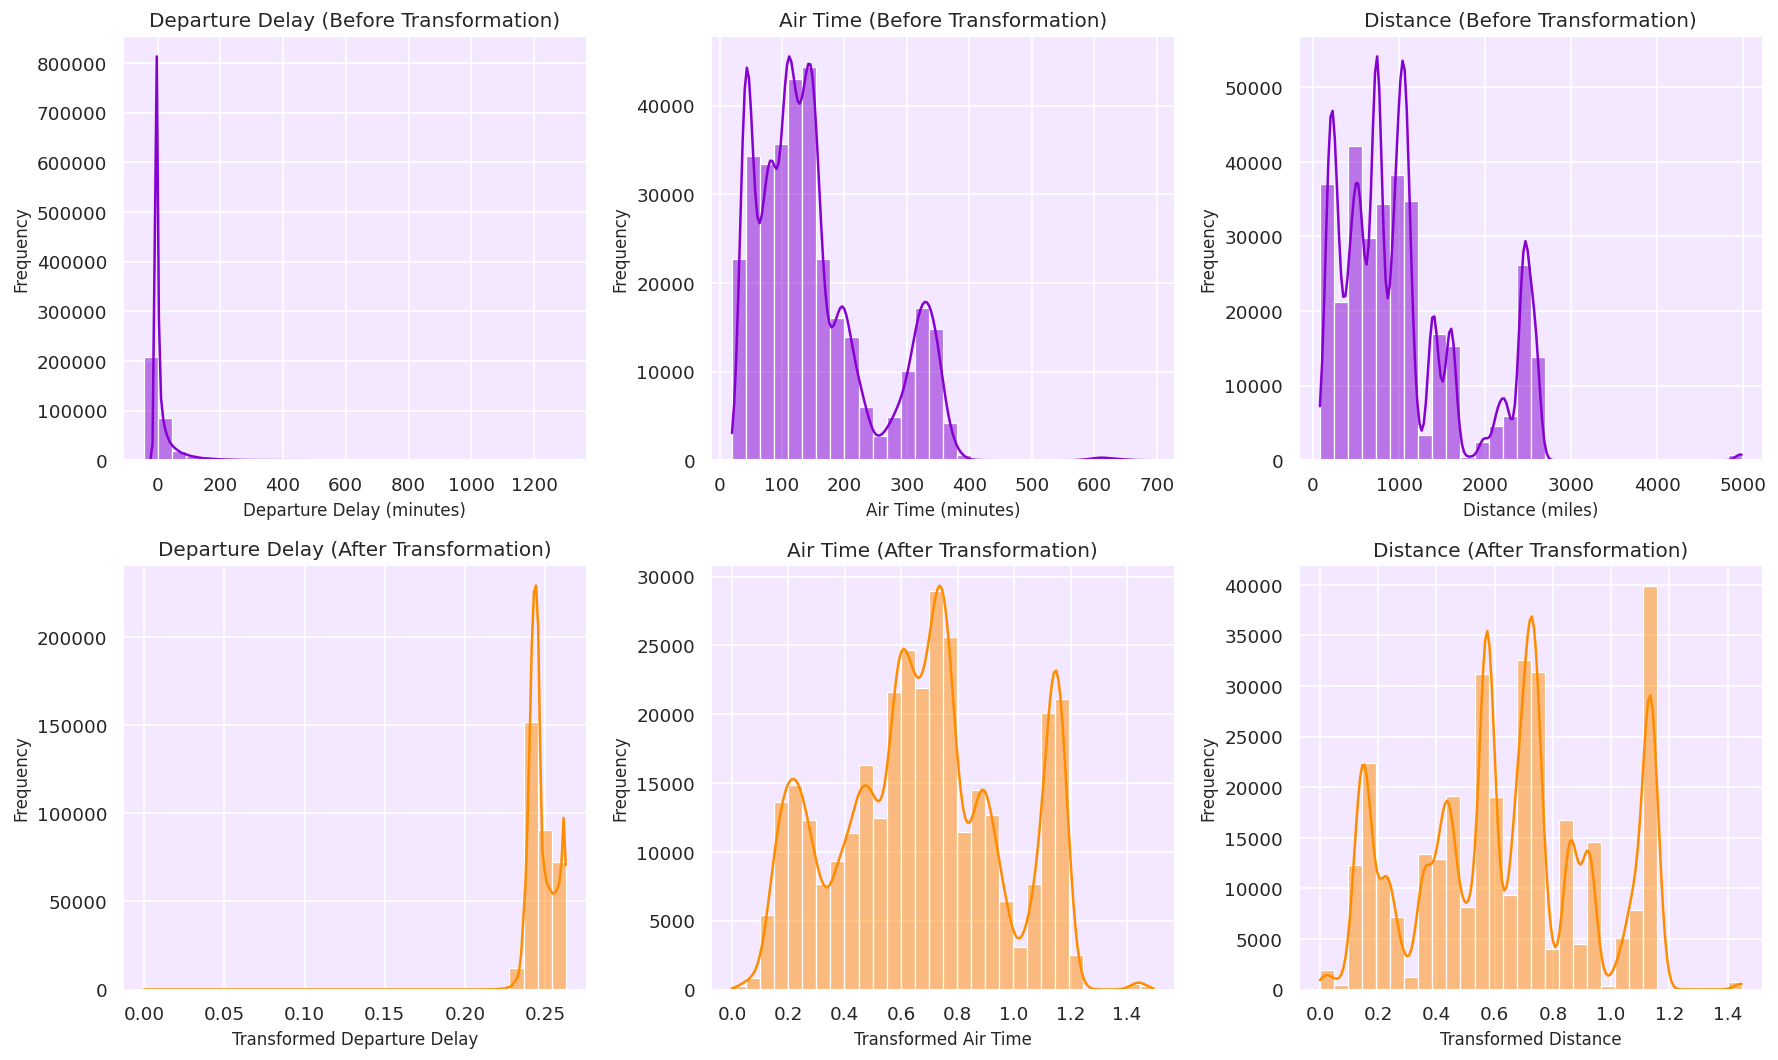

In [ ]:
# Identify the features that might need a Box-Cox transformation
skewed_features = ['dep_delay', 'air_time', 'distance']

# Copy the dataset
X_transformed = X_encoded.copy()

# Apply Box-Cox transformation
for feature in skewed_features:
    # Adding a constant value to make all values positive
    X_transformed[feature] = X_transformed[feature] + abs(X_transformed[feature].min()) + 1
    X_transformed[feature], _ = stats.boxcox(X_transformed[feature])


# Plot histograms of 'dep_delay', 'air_time', and 'distance' before transformation
plt.figure(figsize=(15, 9))

plt.subplot(2, 3, 1)
plot_hist(df['dep_delay'], title='Departure Delay (Before Transformation)', xlabel='Departure Delay (minutes)', color='#8502d1')

plt.subplot(2, 3, 2)
plot_hist(df['air_time'], title='Air Time (Before Transformation)', xlabel='Air Time (minutes)', color='#8502d1')

plt.subplot(2, 3, 3)
plot_hist(df['distance'], title='Distance (Before Transformation)', xlabel='Distance (miles)', color='#8502d1')


# Plot histograms of 'dep_delay', 'air_time', and 'distance' after transformation
plt.subplot(2, 3, 4)
plot_hist(X_transformed['dep_delay'], title='Departure Delay (After Transformation)', xlabel='Transformed Departure Delay', color='darkorange')

plt.subplot(2, 3, 5)
plot_hist(X_transformed['air_time'], title='Air Time (After Transformation)', xlabel='Transformed Air Time', color='darkorange')

plt.subplot(2, 3, 6)
plot_hist(X_transformed['distance'], title='Distance (After Transformation)', xlabel='Transformed Distance', color='darkorange')

# Set global tick label size
plt.rcParams['xtick.labelsize'] = 'small'  # for x-axis
plt.rcParams['ytick.labelsize'] = 'small'  # for y-axis

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">

The histograms above show the distributions of `dep_delay`, `air_time`, and `distance` before and after the __Box-Cox__ transformation. In the first row, you can see the original distributions, which are right-skewed. After applying the Box-Cox transformation (shown in the second row), the features become more normally distributed, which is desirable for many machine learning models. __This transformation helps manage the influence of outliers and extreme values in these features, allowing the models to better learn from the data.__

In [ ]:
X_transformed.head()

,month,day,dep_delay,dest,air_time,distance,origin_JFK,origin_LGA,name_Alaska Airlines Inc.,name_American Airlines Inc.,...,name_United Air Lines Inc.,name_Virgin America,dep_time_sin,dep_time_cos,sched_dep_time_sin,sched_dep_time_cos,arr_time_sin,arr_time_cos,sched_arr_time_sin,sched_arr_time_cos
0,-1.630263,-1.679414,0.247770,-0.290559,0.959361,0.860244,False,False,False,False,...,True,False,0.976485,0.215588,0.975342,2.206974e-01,0.824126,-0.566406,0.840094,-0.542442
1,-1.630263,-1.679414,0.249037,-0.290559,0.959361,0.865612,False,True,False,False,...,True,False,0.984656,0.174508,0.982774,1.848091e-01,0.793353,-0.608761,0.824126,-0.566406
2,-1.630263,-1.679414,0.247770,0.558148,0.783470,0.743137,True,False,False,True,...,False,False,0.988494,0.151261,0.987688,1.564345e-01,0.663273,-0.748377,0.793353,-0.608761
3,-1.630263,-1.679414,0.245580,-1.457249,0.850771,0.916369,True,False,False,False,...,False,False,0.989272,0.146083,0.989651,1.434926e-01,0.490904,-0.871214,0.449319,-0.893371
4,-1.630263,-1.679414,0.240943,1.545420,0.625846,0.584809,False,True,False,False,...,False,False,0.992757,0.120137,1.000000,6.123234e-17,0.849893,-0.526956,0.813608,-0.581413


In [ ]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   month                          327346 non-null  float64
 1   day                            327346 non-null  float64
 2   dep_delay                      327346 non-null  float64
 3   dest                           327346 non-null  float64
 4   air_time                       327346 non-null  float64
 5   distance                       327346 non-null  float64
 6   origin_JFK                     327346 non-null  bool   
 7   origin_LGA                     327346 non-null  bool   
 8   name_Alaska Airlines Inc.      327346 non-null  bool   
 9   name_American Airlines Inc.    327346 non-null  bool   
 10  name_Delta Air Lines Inc.      327346 non-null  bool   
 11  name_Endeavor Air Inc.         327346 non-null  bool   
 12  name_Envoy Air                

<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:110%; text-align:left">

We've tidied up our data and it's now looking great! It's prepped, primed, and ready to dive into the world of machine learning models. Let the training begin!

# Conclusion

This project involved a comprehensive exploratory data analysis (EDA) of flight data to uncover hidden patterns in delays and cancellations. The key takeaways from the analysis are:

- **Flight Delays:** Most flights are delayed by less than 30 minutes. However, a few extreme delays significantly impact the overall distribution.
- **Airline & Airport Influence:** Some airlines and airports consistently show higher delays and cancellation rates, indicating potential operational inefficiencies.
- **Cancellation Reasons:** Weather and carrier issues are the most common causes of flight cancellations. Patterns vary by airline.
- **Distance vs. Air Time:** A strong positive correlation confirms expected trends and validates the dataset.
- **Data Preprocessing:** Missing values were handled using `KNNImputer`, outliers were removed using the Z-score method, and numerical features were standardized using `StandardScaler`.

This EDA sets a solid foundation for further modeling, such as building machine learning models to **predict delays**, or performing clustering analysis to identify **similar behavior among airports or airlines**.


<h2 align="left"><font color='#8502d1'>Best Regards!</font></h2>